1. メッシュの分割と可視化
2. pyrosmによるopenstreetmapの情報の取得と分割
3. geotag付きtweetの取得と分割
4. 交通ネットワークによるネットワークの作成
   

# 1. メッシュの分割と可視化

In [21]:
#メッシュの分割と可視化
from pathlib import Path
import pandas as pd

mesh_2020_01_all_df = pd.read_csv('/home/yamanishi/project/trip_recommend/data/flow/mesh/2020_01_mesh.csv')
mesh1km_tokyo_2020_01_dir = Path('/home/yamanishi/project/trip_recommend/data/flow/13/2020/01')
attribute_dir = Path('/home/yamanishi/project/trip_recommend/data/flow/attribute')
attr_2020_df = pd.read_csv(attribute_dir/'attribute_mesh1km_2020.csv')
mesh_2020_01_tokyo_df = pd.read_csv(mesh1km_tokyo_2020_01_dir/'monthly_mdp_mesh1km.csv')

In [7]:
import geopandas as gpd
attr_cols = [col for col in attr_2020_df.columns if col not in ['prefcode', 'citycode']]
sample_df = pd.merge(mesh_2020_01_tokyo_df, attr_2020_df[attr_cols], how='left', on='mesh1kmid')
sample_gdf = gpd.GeoDataFrame(sample_df, geometry=gpd.points_from_xy(sample_df.lon_center, sample_df.lat_center))
sample_gdf = sample_gdf.query('35 < lat_center < 36 & 139 < lon_center < 140')

/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/study_group/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [8]:
tokyo_meshid = sample_gdf.mesh1kmid.unique()

In [15]:
len(tokyo_meshid)

1452

In [10]:
sample_gdf.head()

mesh1kmid  prefcode  citycode  year  month  dayflag  timezone  population  \
0   53394519        13     13101  2020      1        0         0       12406   
1   53394519        13     13101  2020      1        0         1        5345   
2   53394519        13     13101  2020      1        0         2        8259   
3   53394519        13     13101  2020      1        1         0       61345   
4   53394519        13     13101  2020      1        1         1        9523   

   lon_center  lat_center  lon_max    lat_max     lon_min    lat_min  \
0  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
1  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
2  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
3  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
4  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   

                     geometry  
0  POINT (139.74374 35.67916)  
1  POINT (139.74374 35.67916)  
2  POINT (139.74374 35.67916)  
3  POINT (139.74374 35.67916)  
4  POINT (139.74374 35.67916)

In [6]:
print('sample gdf', sample_gdf.columns)
print('mesh all', mesh_2020_01_all_df.columns)

sample gdf Index(['mesh1kmid', 'prefcode', 'citycode', 'year', 'month', 'dayflag',
       'timezone', 'population', 'lon_center', 'lat_center', 'lon_max',
       'lat_max', 'lon_min', 'lat_min', 'geometry'],
      dtype='object')
mesh all Index(['Unnamed: 0', 'mesh1kmid', 'year', 'month', '0_0', '0_1', '0_2', '1_0',
       '1_1', '1_2', '2_0', '2_1', '2_2', 'prefname', 'cityname', 'address',
       'lon_center', 'lat_center', 'lon_max', 'lat_max', 'lon_min', 'lat_min',
       'prefcode'],
      dtype='object')


In [22]:
tokyo_2020_01 = mesh_2020_01_all_df[mesh_2020_01_all_df['mesh1kmid'].isin(tokyo_meshid)]
tokyo_2020_01_gdf = gpd.GeoDataFrame(tokyo_2020_01, geometry=gpd.points_from_xy(tokyo_2020_01.lon_center, tokyo_2020_01.lat_center))
tokyo_2020_01_gdf = sample_gdf.query('35 < lat_center < 36 & 139 < lon_center < 140')

In [23]:
print(tokyo_2020_01_gdf.columns)
print(len(tokyo_2020_01_gdf))

Index(['mesh1kmid', 'prefcode', 'citycode', 'year', 'month', 'dayflag',
       'timezone', 'population', 'lon_center', 'lat_center', 'lon_max',
       'lat_max', 'lon_min', 'lat_min', 'geometry'],
      dtype='object')
12490


In [20]:
tokyo_2020_01_gdf.head()

mesh1kmid  prefcode  citycode  year  month  dayflag  timezone  population  \
0   53394519        13     13101  2020      1        0         0       12406   
1   53394519        13     13101  2020      1        0         1        5345   
2   53394519        13     13101  2020      1        0         2        8259   
3   53394519        13     13101  2020      1        1         0       61345   
4   53394519        13     13101  2020      1        1         1        9523   

   lon_center  lat_center  lon_max    lat_max     lon_min    lat_min  \
0  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
1  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
2  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
3  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   
4  139.743744   35.679165   139.75  35.683334  139.737503  35.674999   

                     geometry  
0  POINT (139.74374 35.67916)  
1  POINT (139.74374 35.67916)  
2  POINT (139.74374 35.67916)  
3  POINT (139.74374 35.67916)  
4  POINT (139.74374 35.67916)

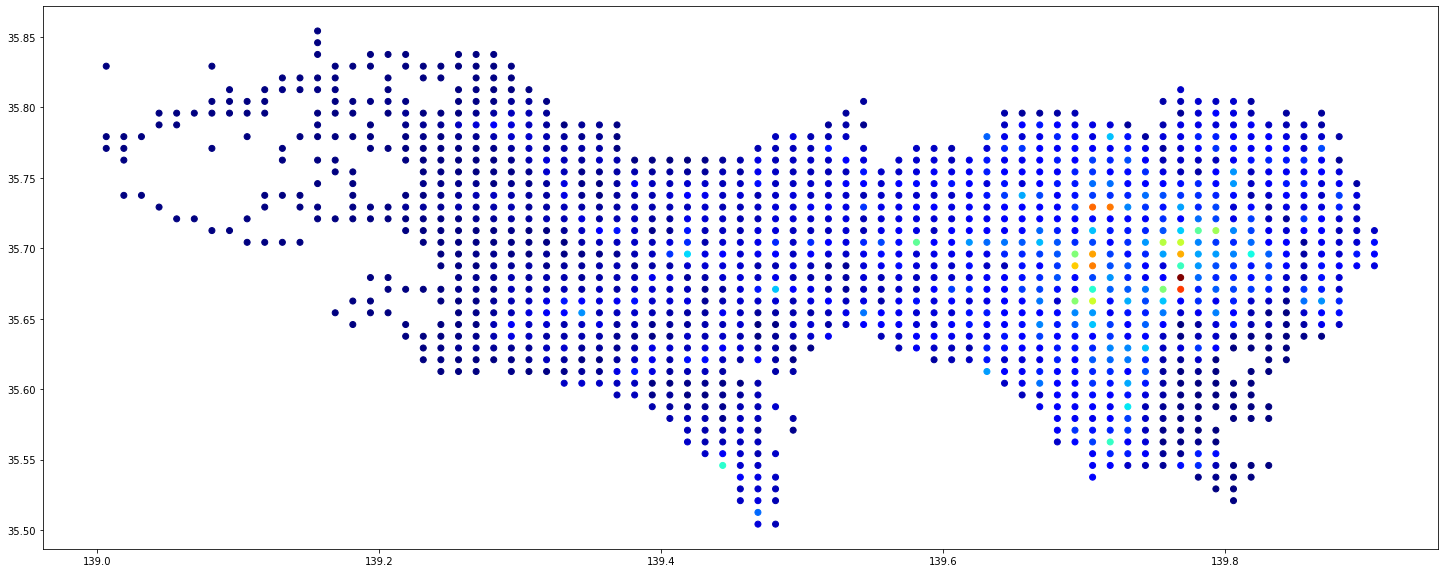

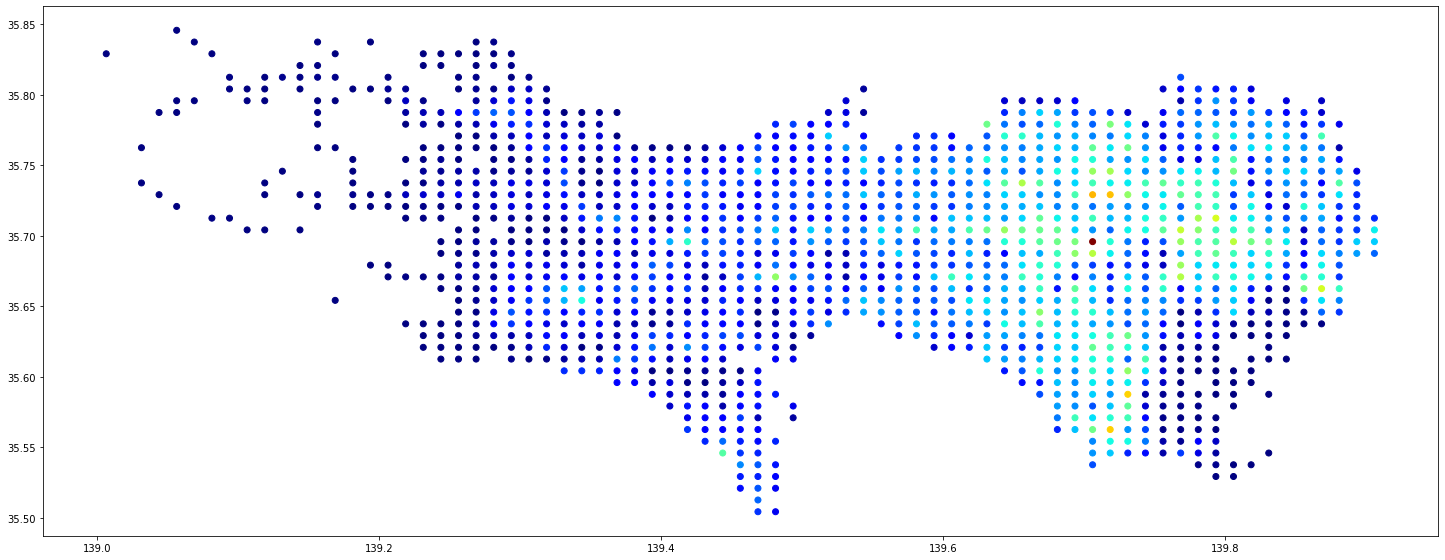

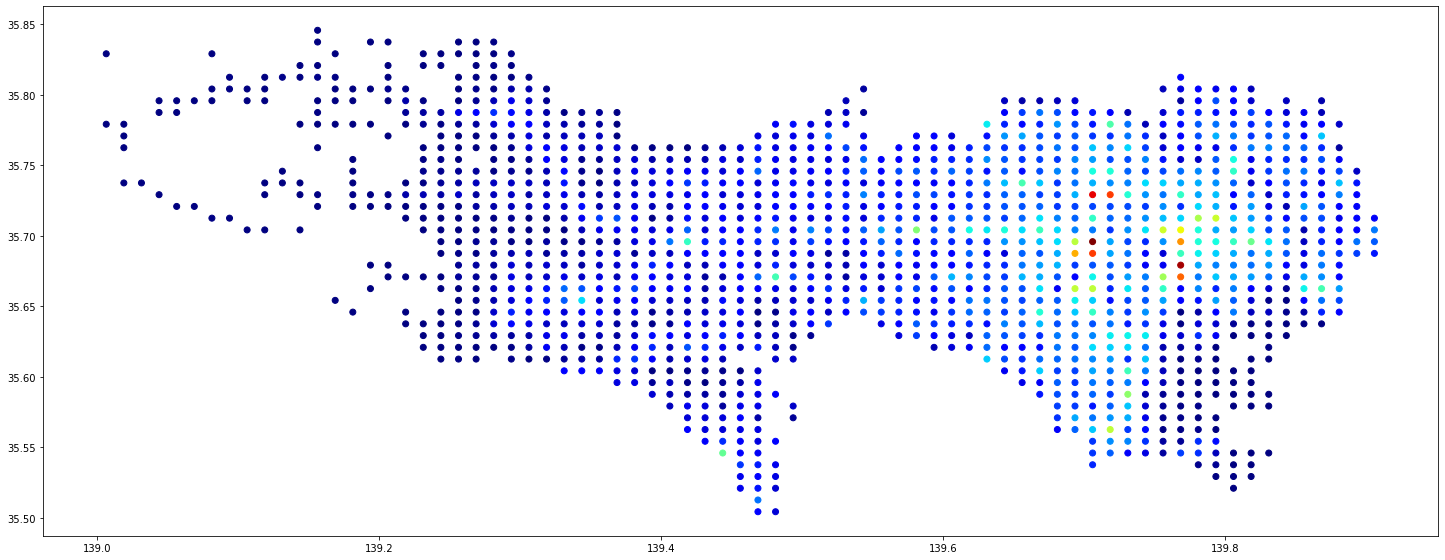

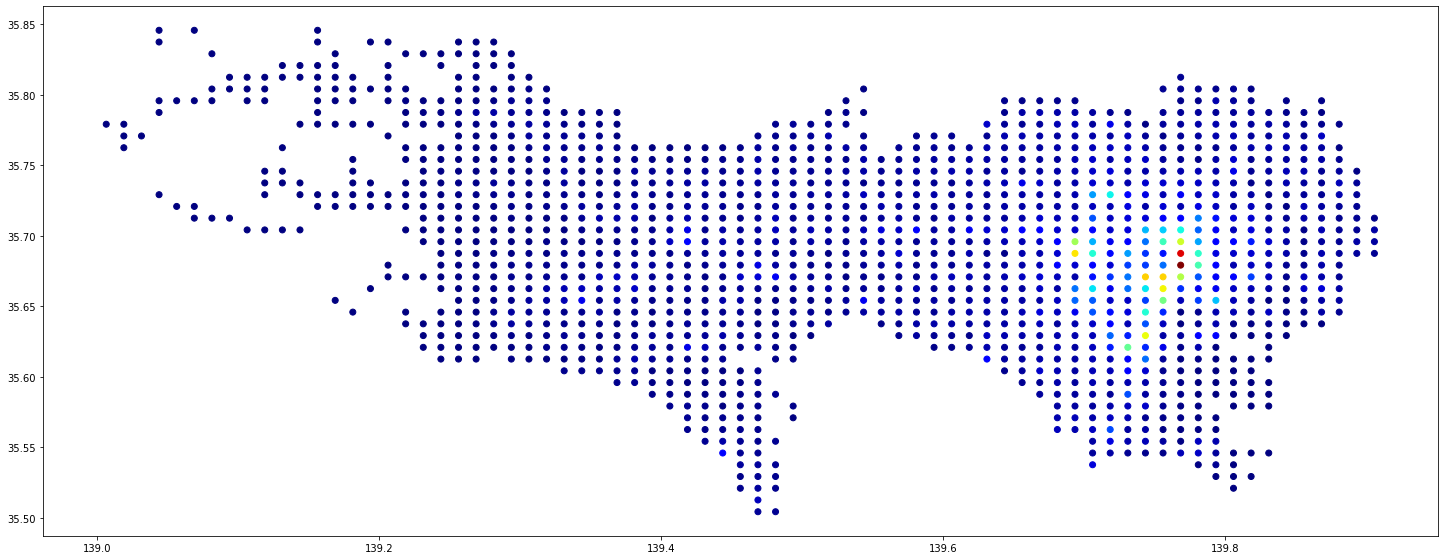

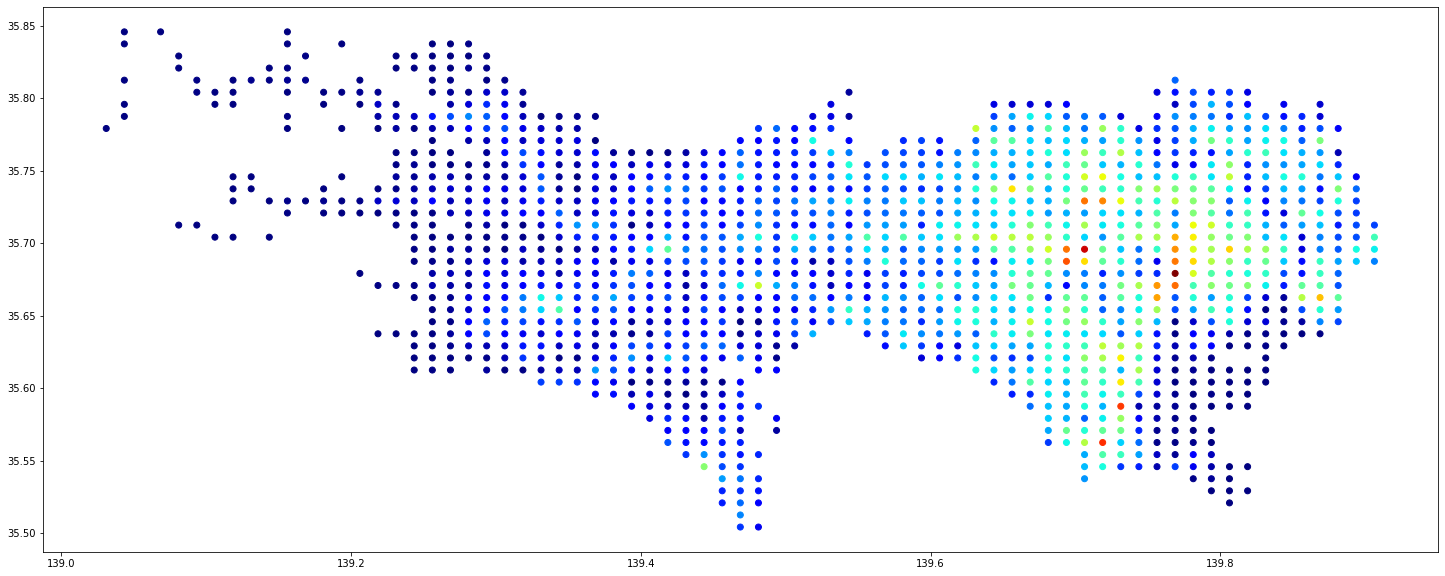

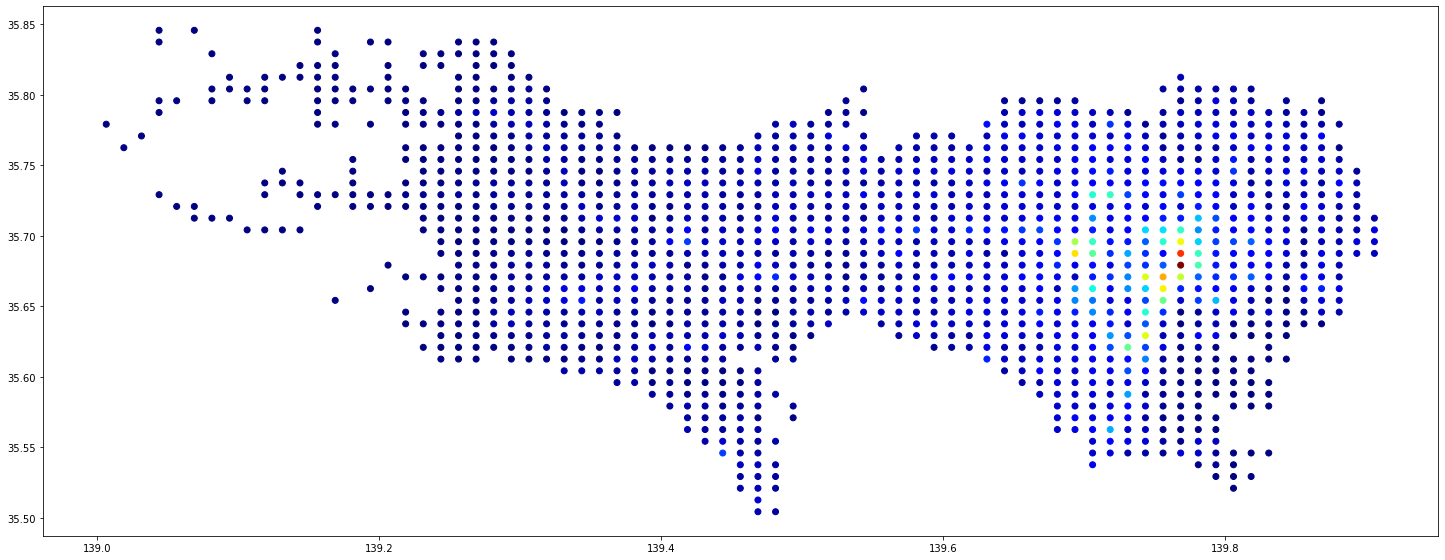

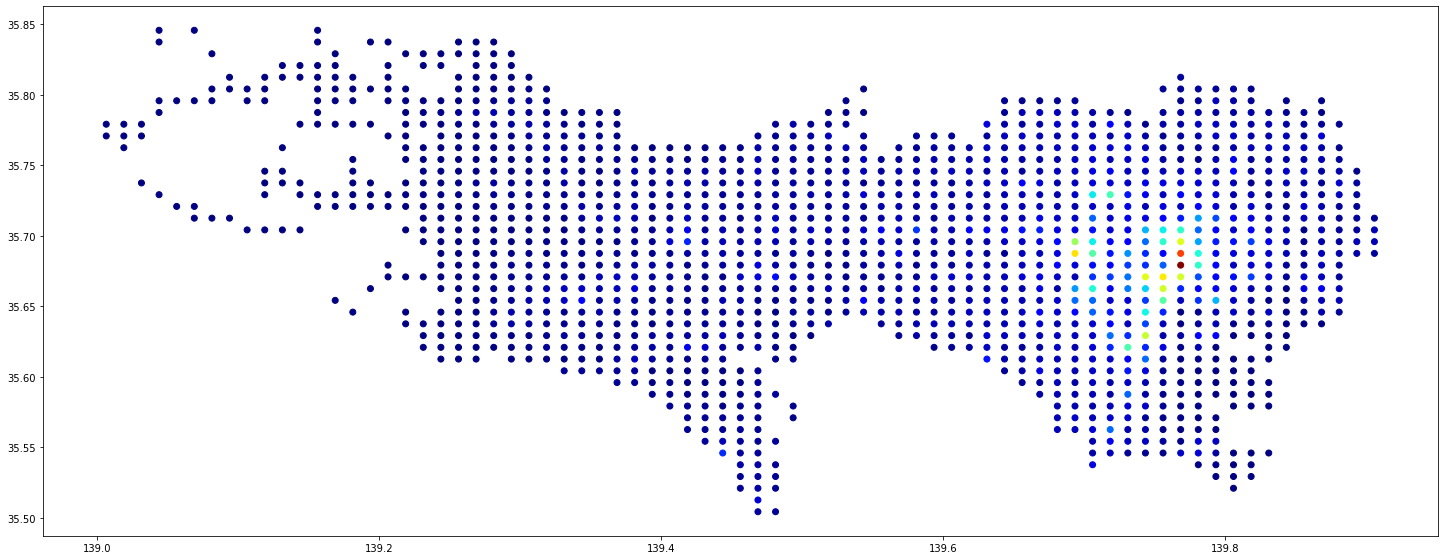

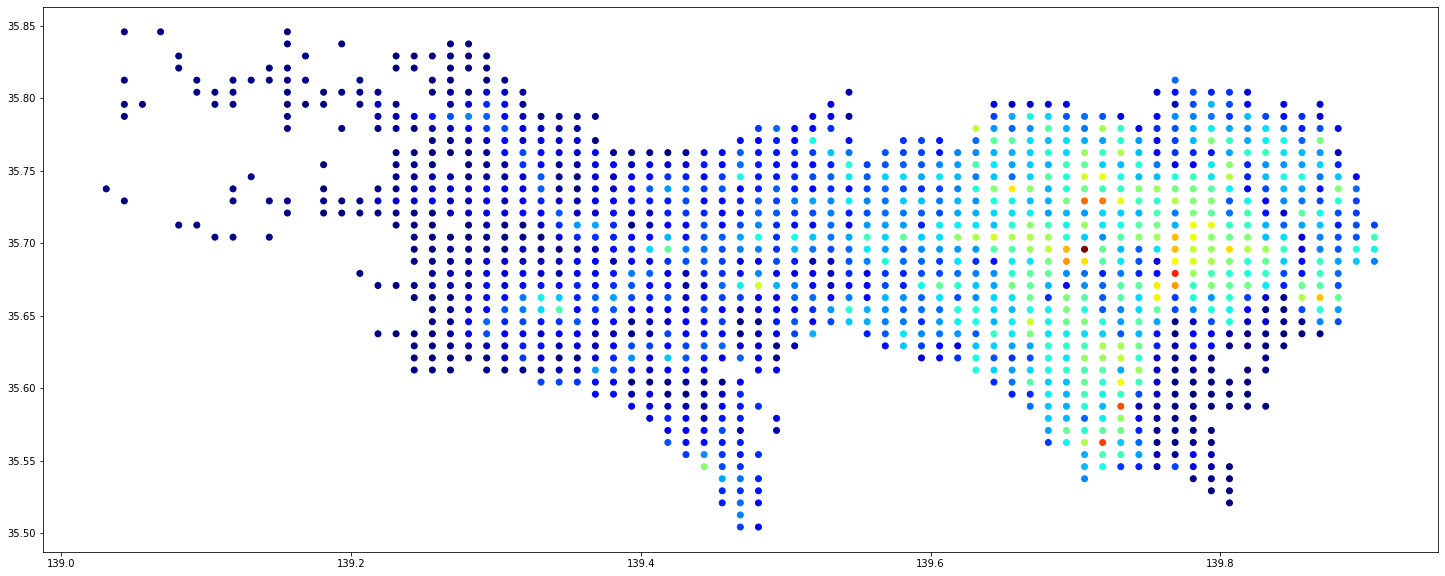

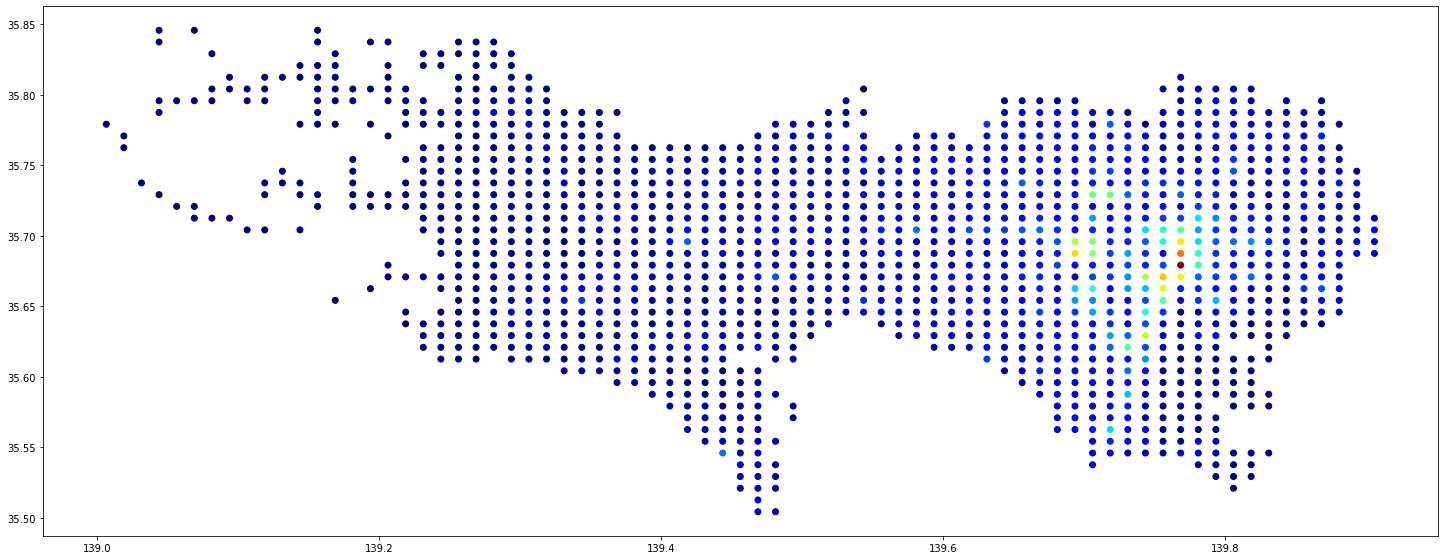

In [25]:
#dayflag 0:平日 1:休日 2: 終日
#timezone 0:昼 1:深夜 2: 終日
img_dir = '/home/yamanishi/project/trip_recommend/TS/image/point_mesh'
for dayflag in range(3):
    for timezone in range(3):
        tokyo_2020_01_gdf.plot(column=f'{dayflag}_{timezone}', cmap='jet', figsize=(25, 15))
        filepath = os.path.join(img_dir, f'{dayflag}_{timezone}.png')
        plt.savefig(filepath)


In [21]:
mesh_2020_01_gdf = gpd.GeoDataFrame(mesh_2020_01_all_df, geometry=gpd.points_from_xy(mesh_2020_01_all_df.lon_center, mesh_2020_01_all_df.lat_center))

/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/study_group/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [26]:
len(tokyo_2020_01_gdf)

1452

In [42]:
from shapely.geometry import Polygon
def get_mesh_point(df):
    lat_min = df['lat_min']
    lat_max = df['lat_max']
    lon_min = df['lon_min']
    lon_max = df['lon_max']

    point1 = (lon_min, lat_min)
    point2 = (lon_min, lat_max)
    point3 = (lon_max, lat_max)
    point4 = (lon_max, lat_min)

    return Polygon([point1, point2, point3, point4])

In [43]:
tokyo_2020_01_gdf['geometry'] = tokyo_2020_01_gdf.apply(get_mesh_point, axis=1)

In [1]:
tokyo_2020_01_gdf.isnull().sum()

NameError: name 'tokyo_2020_01_gdf' is not defined

In [44]:
tokyo_2020_01_gdf.set_crs(epsg=4612, inplace=True)

Unnamed: 0  mesh1kmid  year  month     0_0     0_1     0_2     1_0  \
52215         186   53395011  2020      1    74.0     NaN    39.0    83.0   
52216         187   53395012  2020      1     NaN    11.0     NaN     NaN   
52217         188   53395020  2020      1    27.0     NaN     NaN     NaN   
52218         189   53395021  2020      1    29.0     NaN    14.0    22.0   
52219         190   53395022  2020      1     NaN     NaN     NaN    22.0   
...           ...        ...   ...    ...     ...     ...     ...     ...   
53662        1633   53395441  2020      1  3158.0  3804.0  3506.0  2358.0   
53663        1634   53395442  2020      1  4344.0  4943.0  4676.0  4058.0   
53664        1635   53395443  2020      1  1878.0  1495.0  1671.0  1774.0   
53665        1636   53395452  2020      1  3183.0  4201.0  3788.0  2582.0   
53666        1637   53395463  2020      1  3093.0  1553.0  2204.0  2148.0   

          1_1     1_2  ...  cityname      address  lon_center lat_center  \
52215     NaN    38.0  ...  西多摩郡奥多摩町  東京都西多摩郡奥多摩町  139.018753  35.762501   
52216     NaN     NaN  ...  西多摩郡奥多摩町  東京都西多摩郡奥多摩町  139.031250  35.762501   
52217     NaN     NaN  ...  西多摩郡奥多摩町  東京都西多摩郡奥多摩町  139.006256  35.770832   
52218     NaN     NaN  ...  西多摩郡奥多摩町  東京都西多摩郡奥多摩町  139.018753  35.770832   
52219     NaN    10.0  ...  西多摩郡奥多摩町  東京都西多摩郡奥多摩町  139.031250  35.770832   
...       ...     ...  ...       ...          ...         ...        ...   
53662  3908.0  3075.0  ...       清瀬市       東京都清瀬市  139.518753  35.787498   
53663  4601.0  4197.0  ...       清瀬市       東京都清瀬市  139.531250  35.787498   
53664  1579.0  1627.0  ...       清瀬市       東京都清瀬市  139.543747  35.787498   
53665  4300.0  3494.0  ...       清瀬市       東京都清瀬市  139.531250  35.795834   
53666  1400.0  1762.0  ...       清瀬市       東京都清瀬市  139.543747  35.804165   

          lon_max    lat_max     lon_min    lat_min  prefcode  \
52215  139.024994  35.766666  139.012497  35.758335        13   
52216  139.037506  35.766666  139.024994  35.758335        13   
52217  139.012497  35.775002  139.000000  35.766666        13   
52218  139.024994  35.775002  139.012497  35.766666        13   
52219  139.037506  35.775002  139.024994  35.766666        13   
...           ...        ...         ...        ...       ...   
53662  139.524994  35.791668  139.512497  35.783333        13   
53663  139.537506  35.791668  139.524994  35.783333        13   
53664  139.550003  35.791668  139.537506  35.783333        13   
53665  139.537506  35.799999  139.524994  35.791668        13   
53666  139.550003  35.808334  139.537506  35.799999        13   

                                                geometry  
52215  POLYGON ((139.01250 35.75834, 139.01250 35.766...  
52216  POLYGON ((139.02499 35.75834, 139.02499 35.766...  
52217  POLYGON ((139.00000 35.76667, 139.00000 35.775...  
52218  POLYGON ((139.01250 35.76667, 139.01250 35.775...  
52219  POLYGON ((139.02499 35.76667, 139.02499 35.775...  
...                                                  ...  
53662  POLYGON ((139.51250 35.78333, 139.51250 35.791...  
53663  POLYGON ((139.52499 35.78333, 139.52499 35.791...  
53664  POLYGON ((139.53751 35.78333, 139.53751 35.791...  
53665  POLYGON ((139.52499 35.79167, 139.52499 35.800...  
53666  POLYGON ((139.53751 35.80000, 139.53751 35.808...  

[1452 rows x 24 columns]

2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9


/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/study_group/lib/python3.7/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020 10
2020 11
2020 12
2021 1
2021 2
2021 3
2021 4
2021 5
2021 6
2021 7
2021 8
2021 9
2021 10
2021 11
2021 12


<AxesSubplot:>

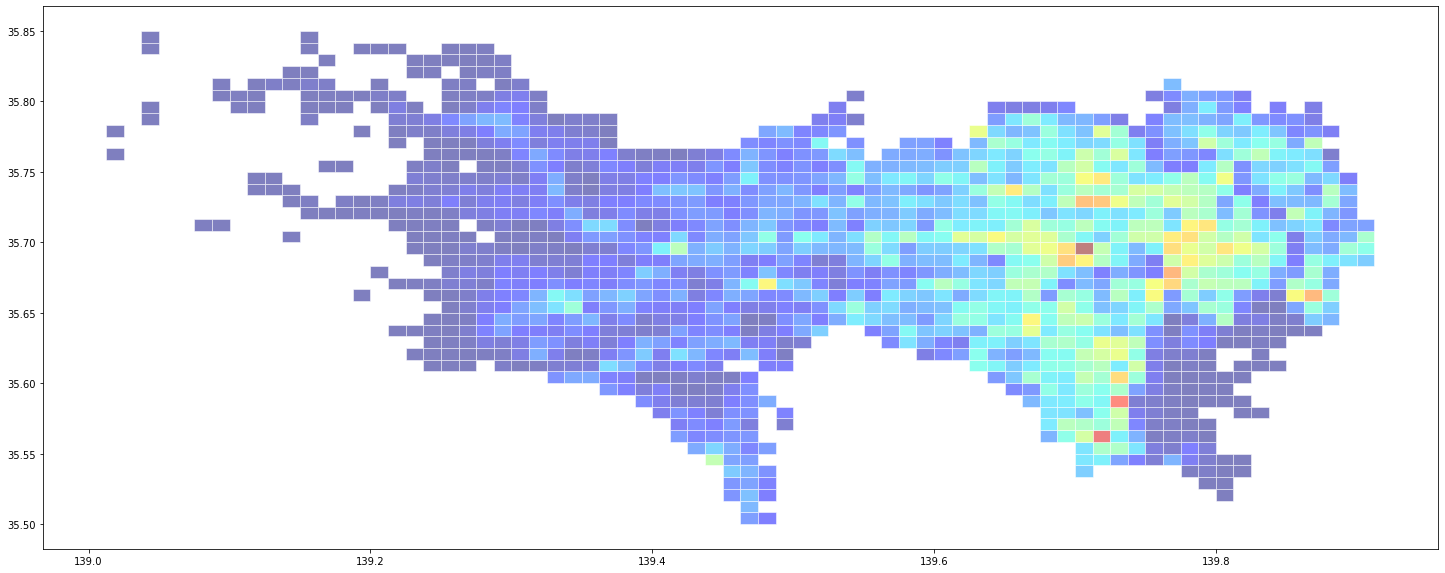

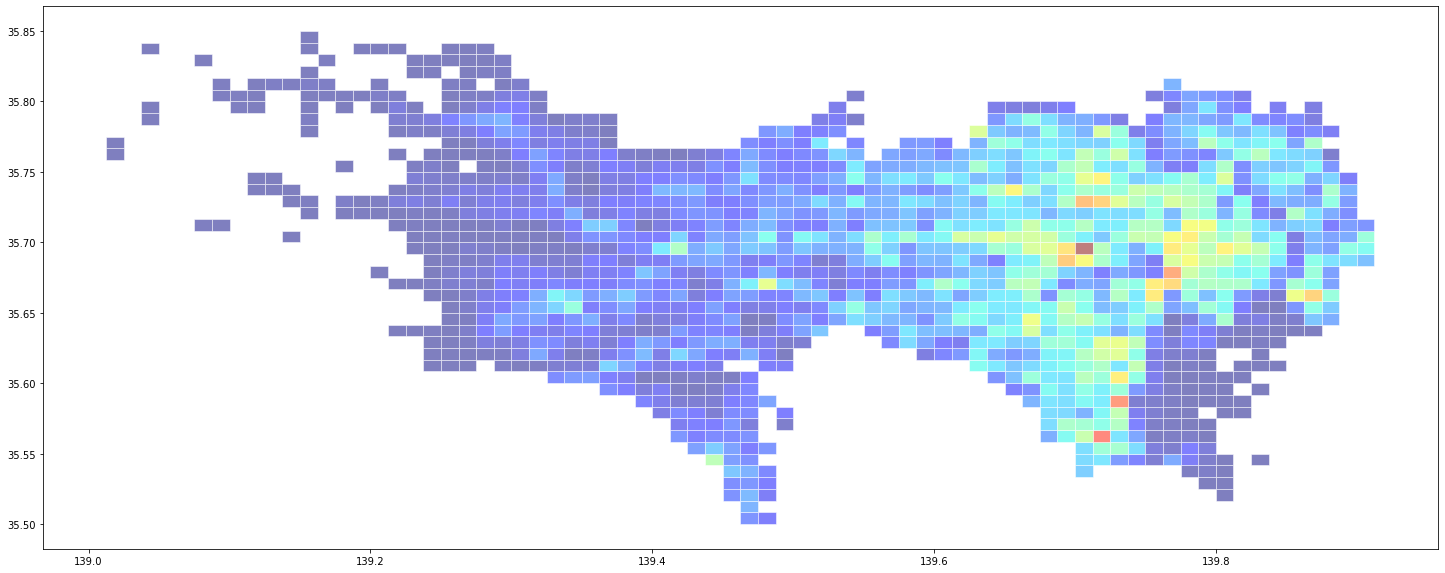

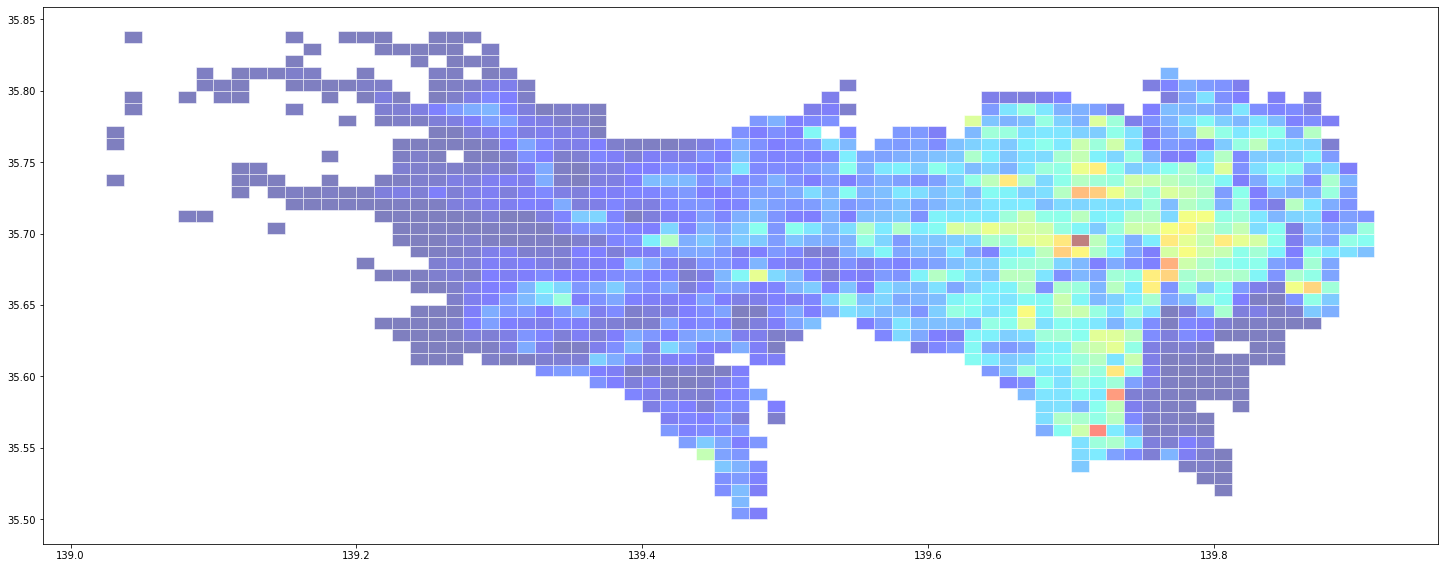

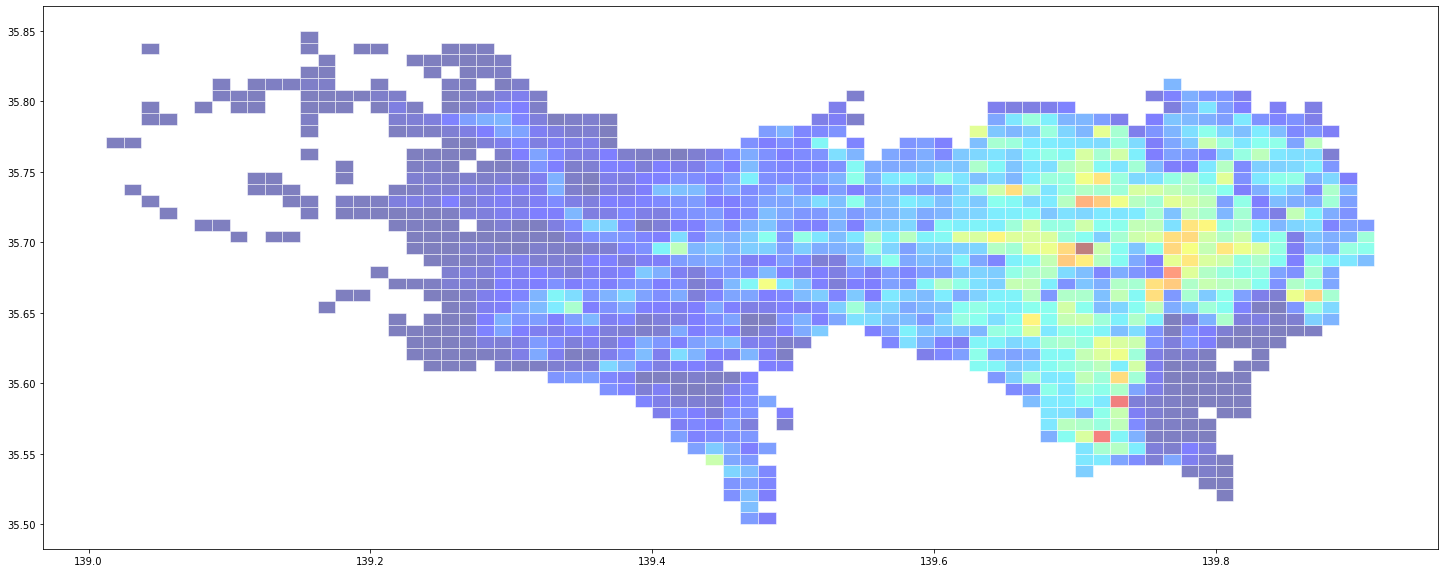

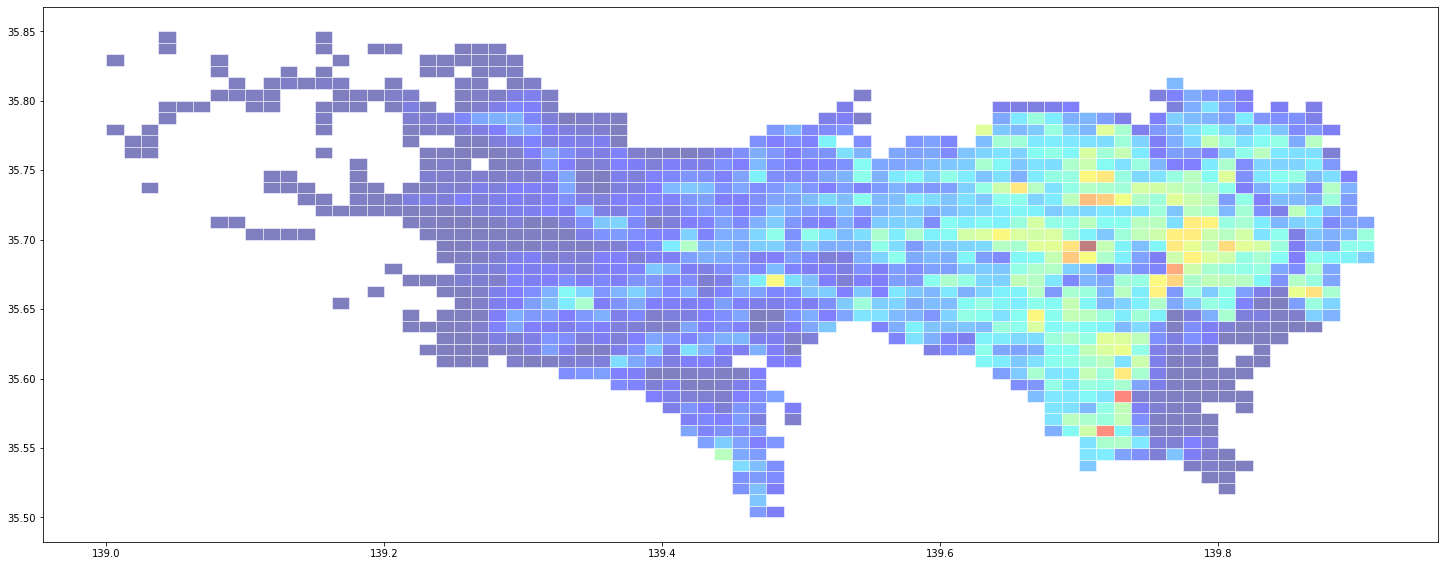

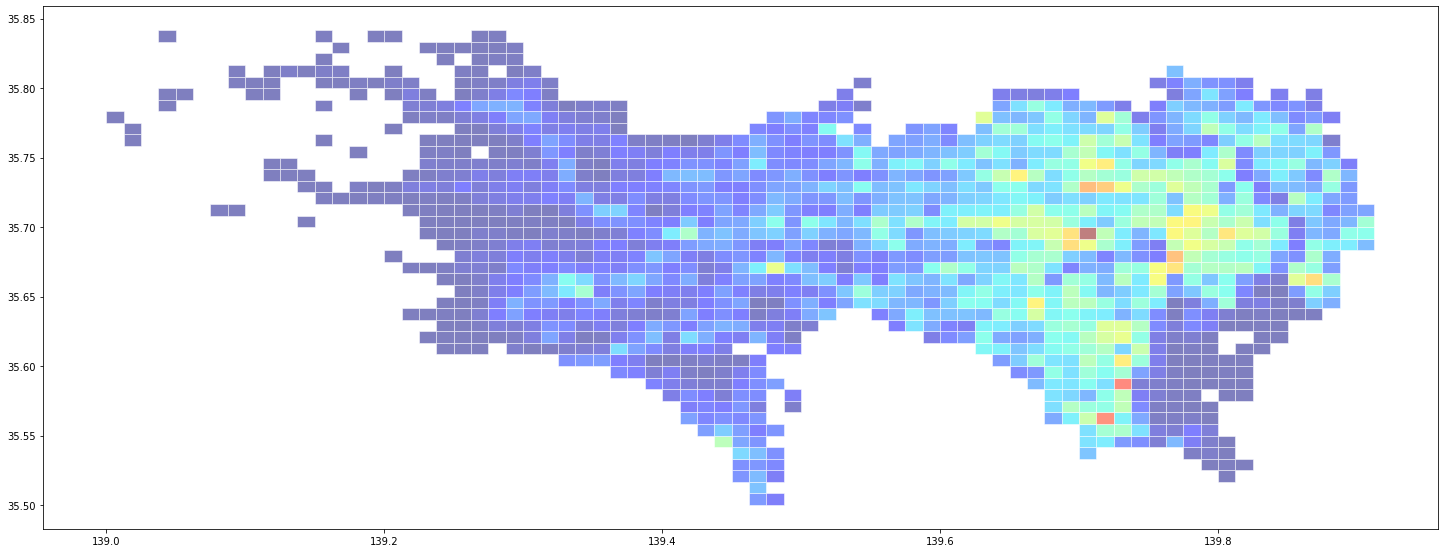

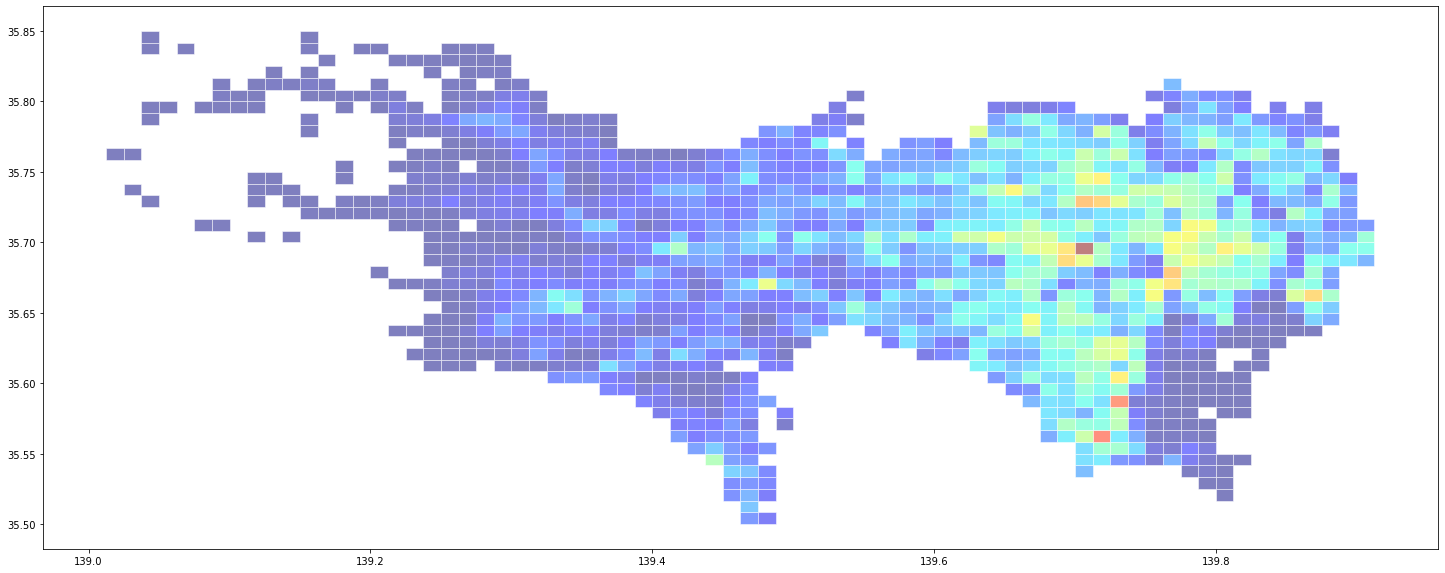

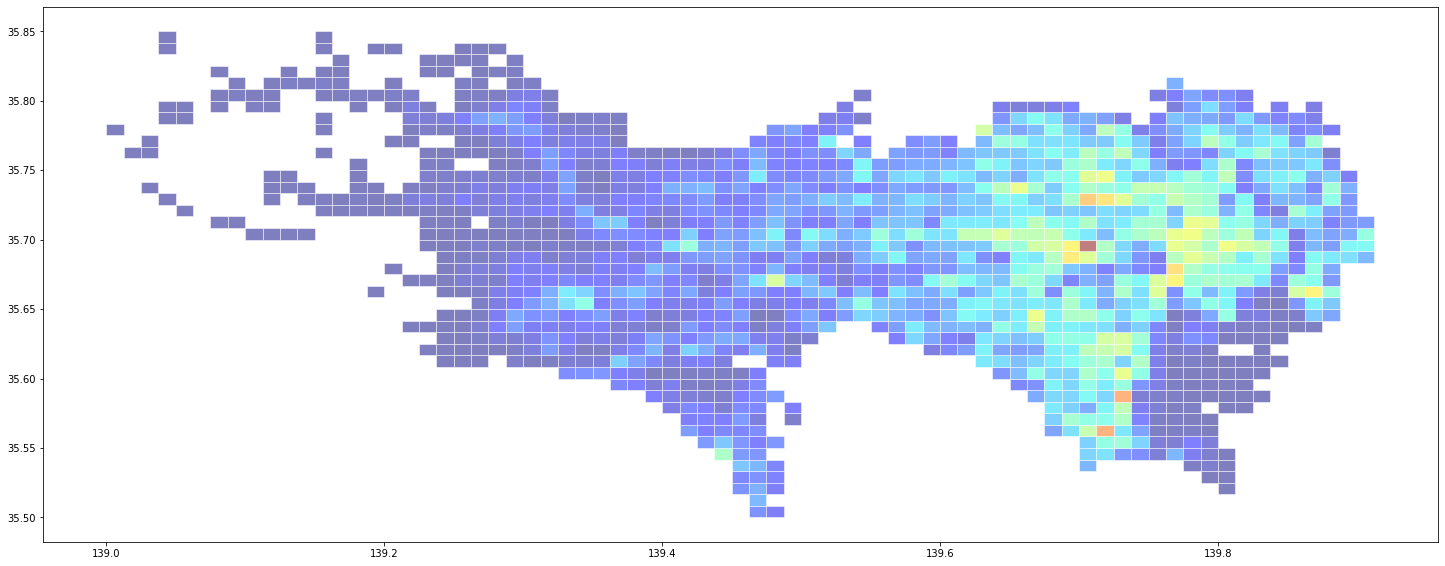

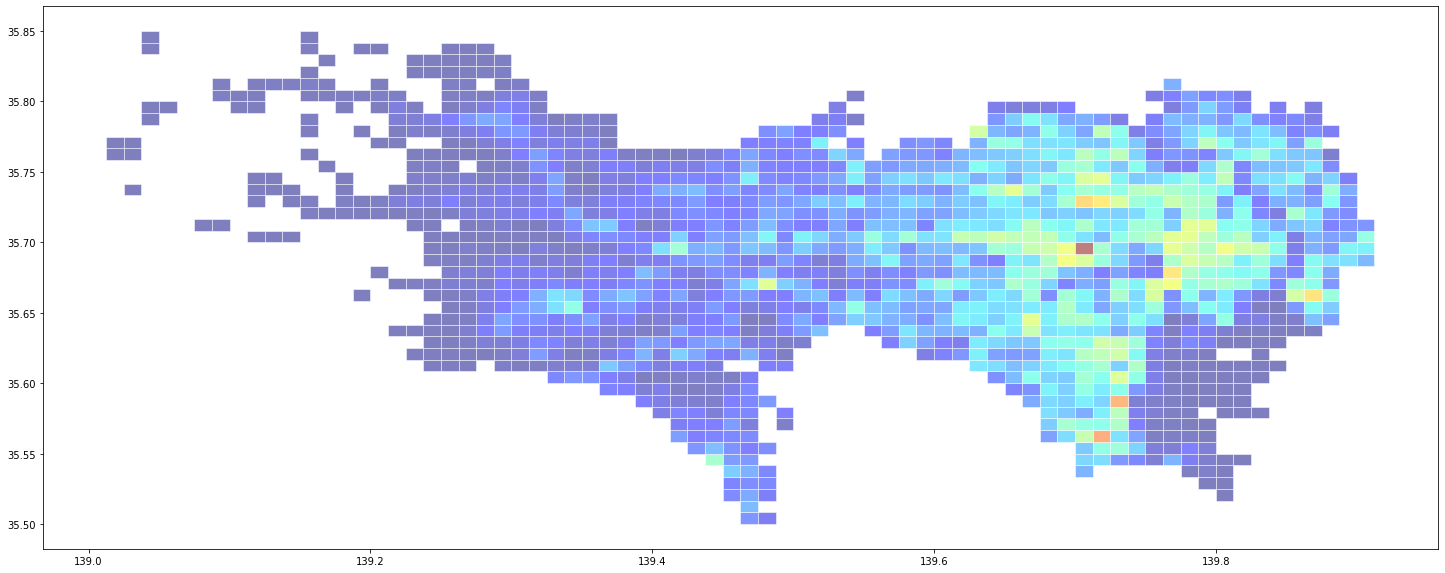

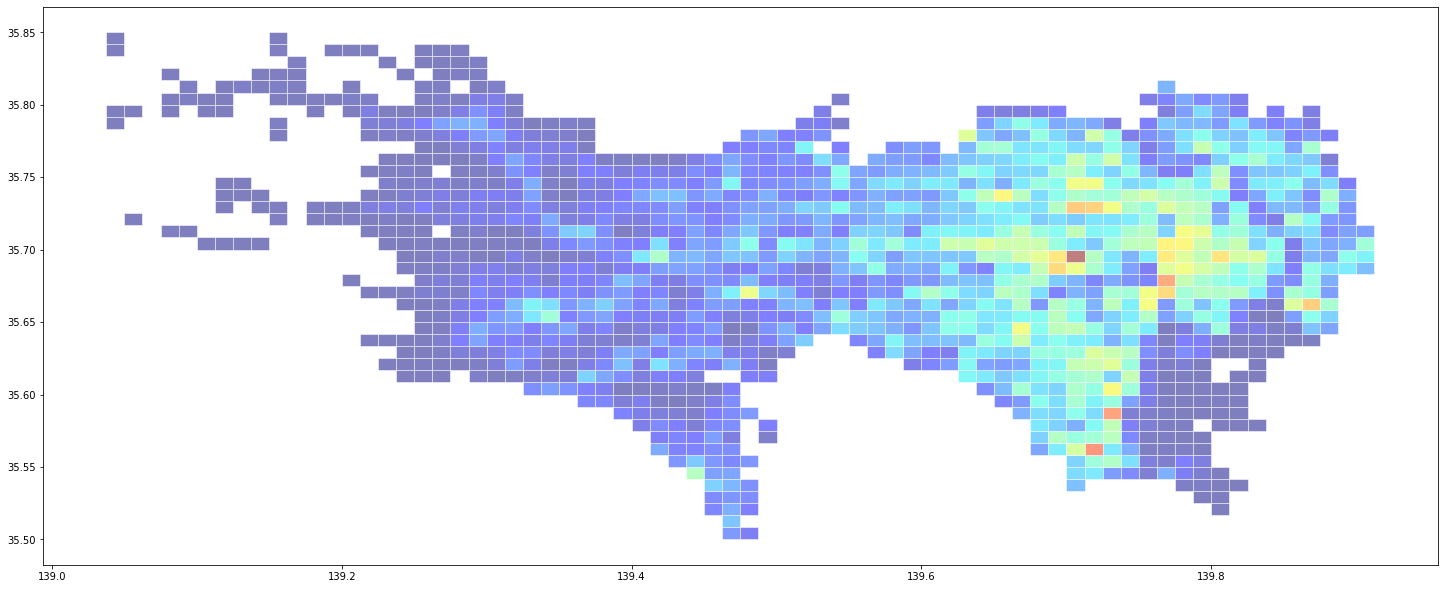

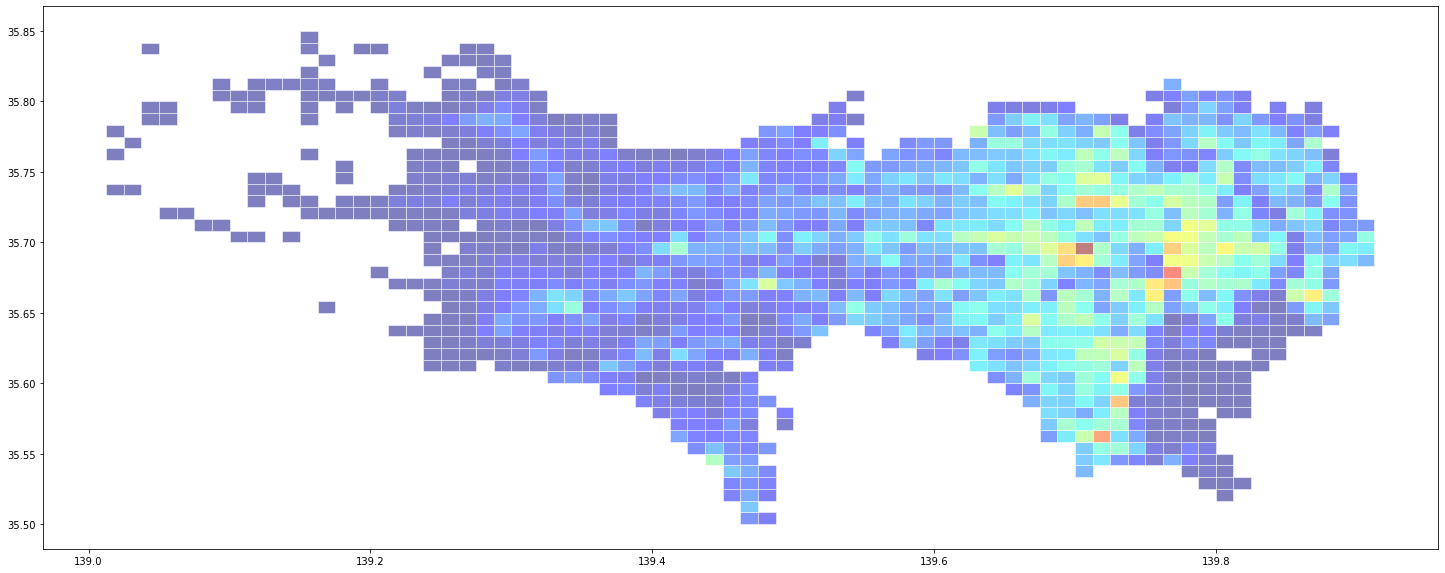

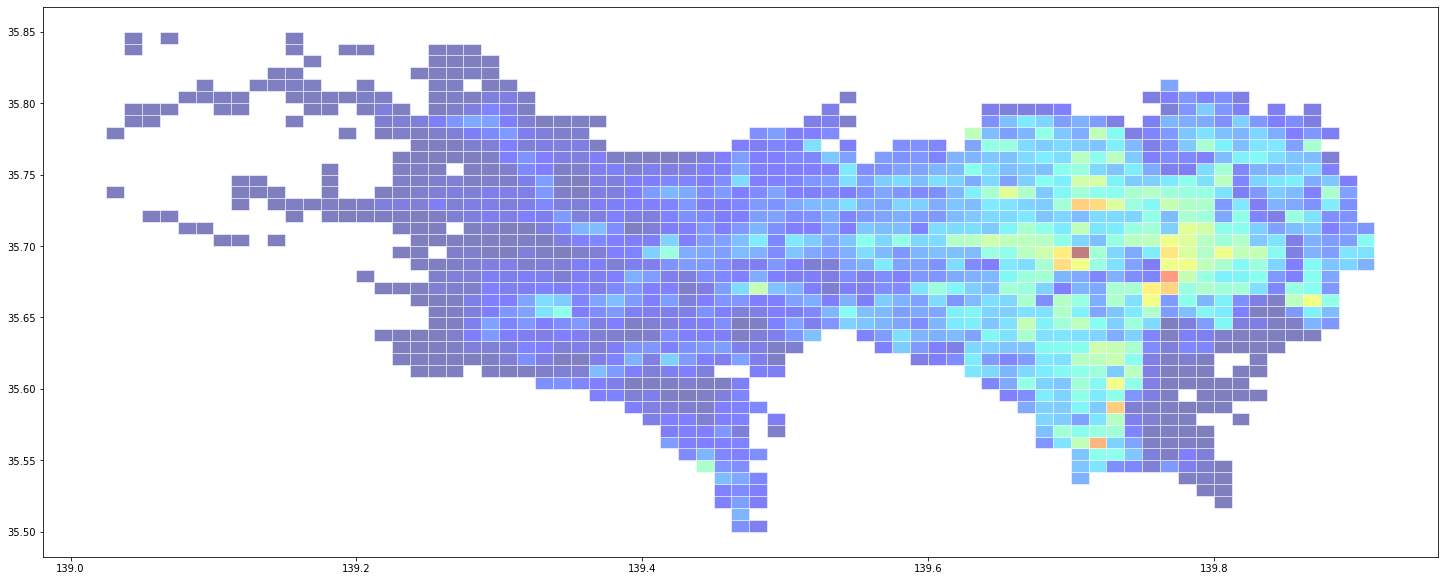

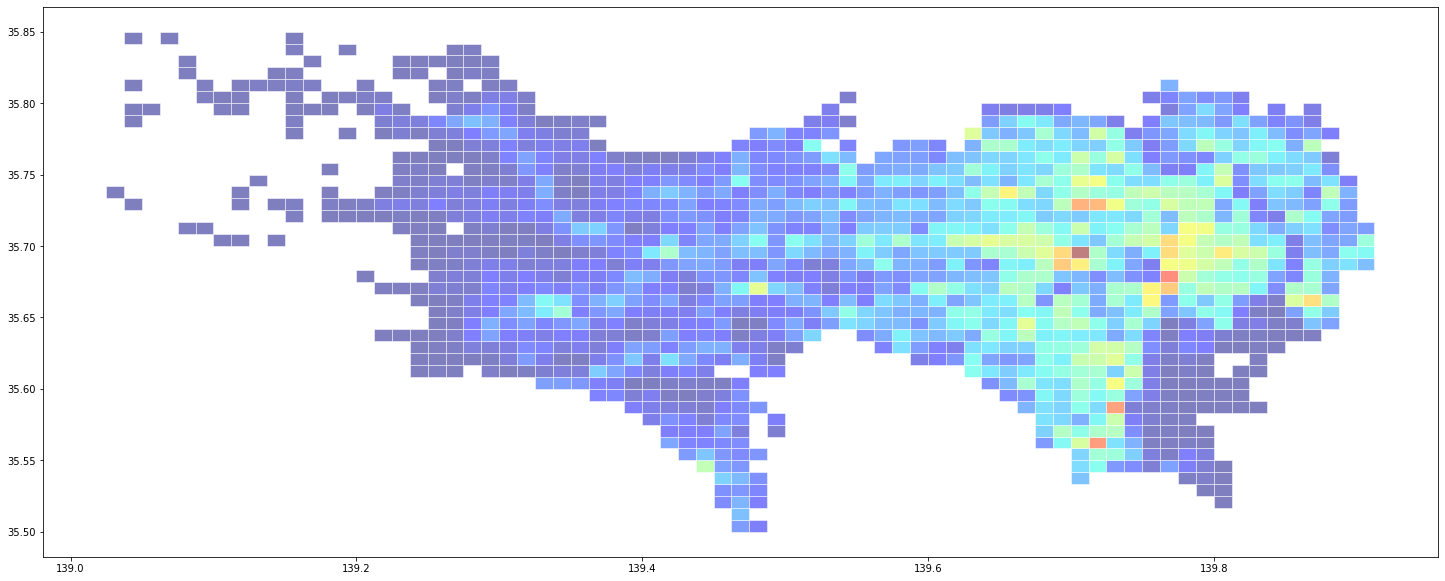

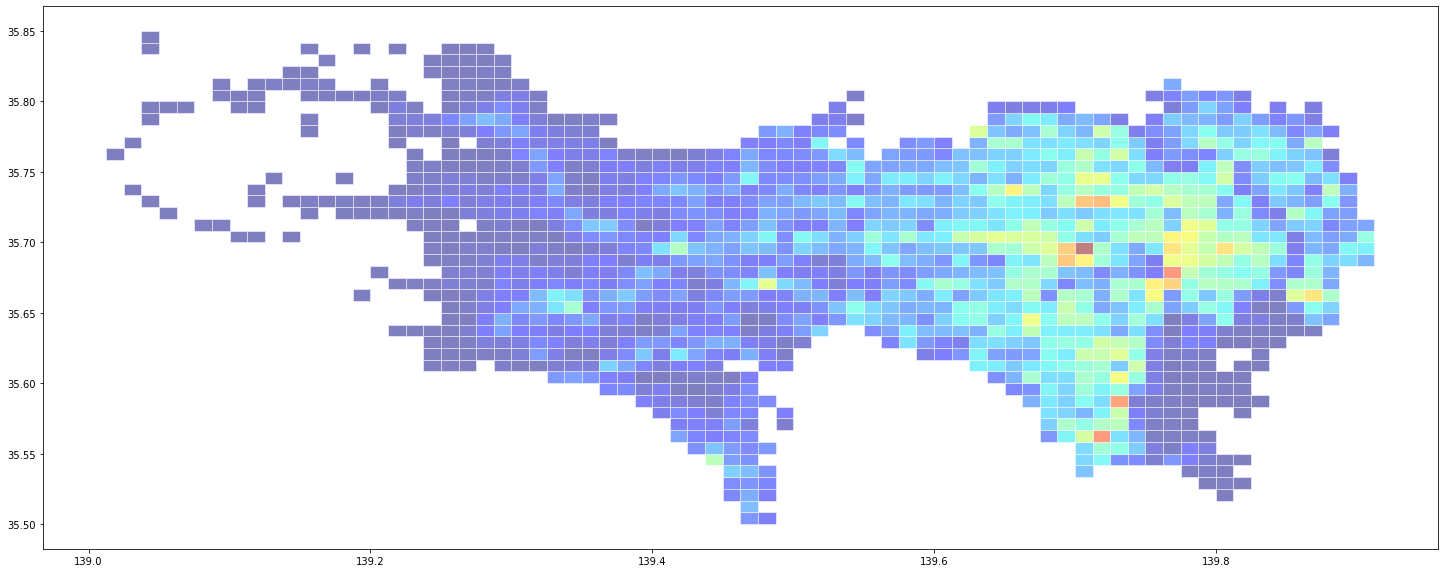

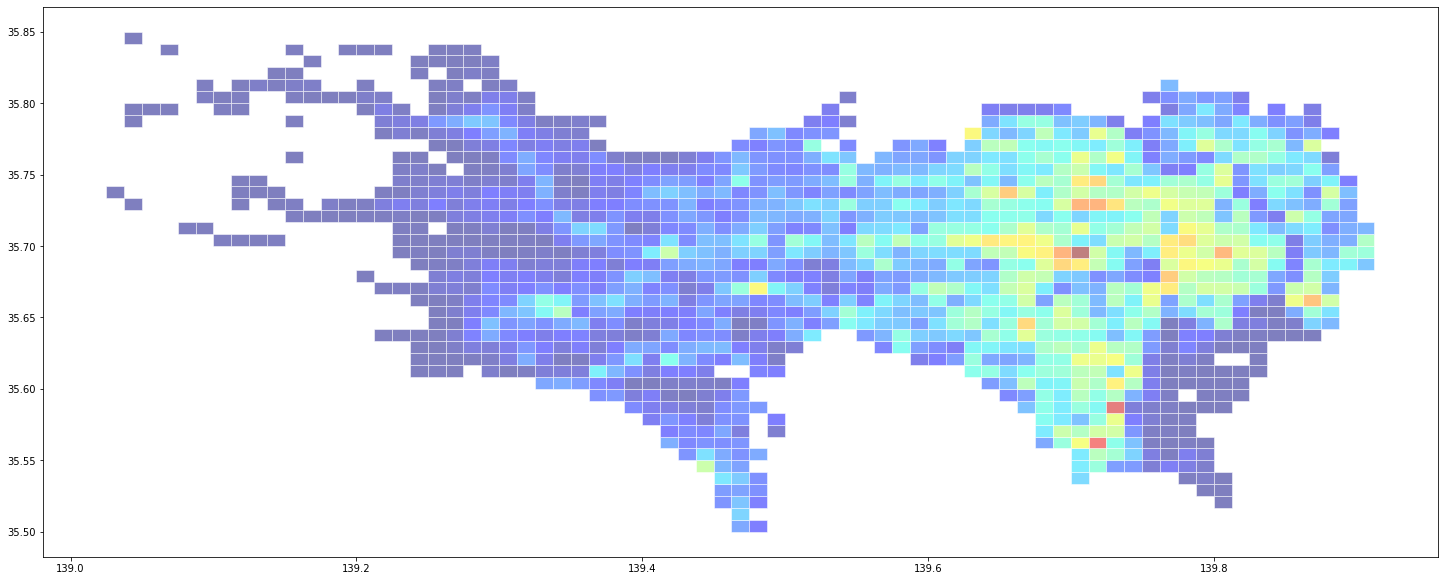

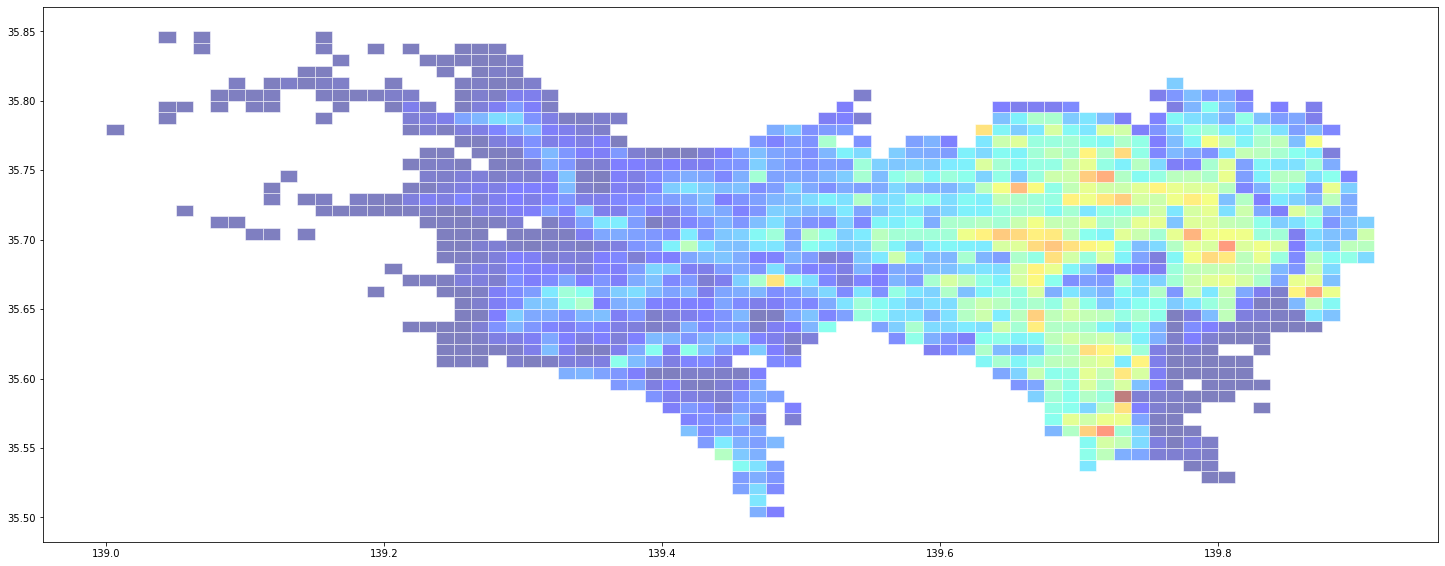

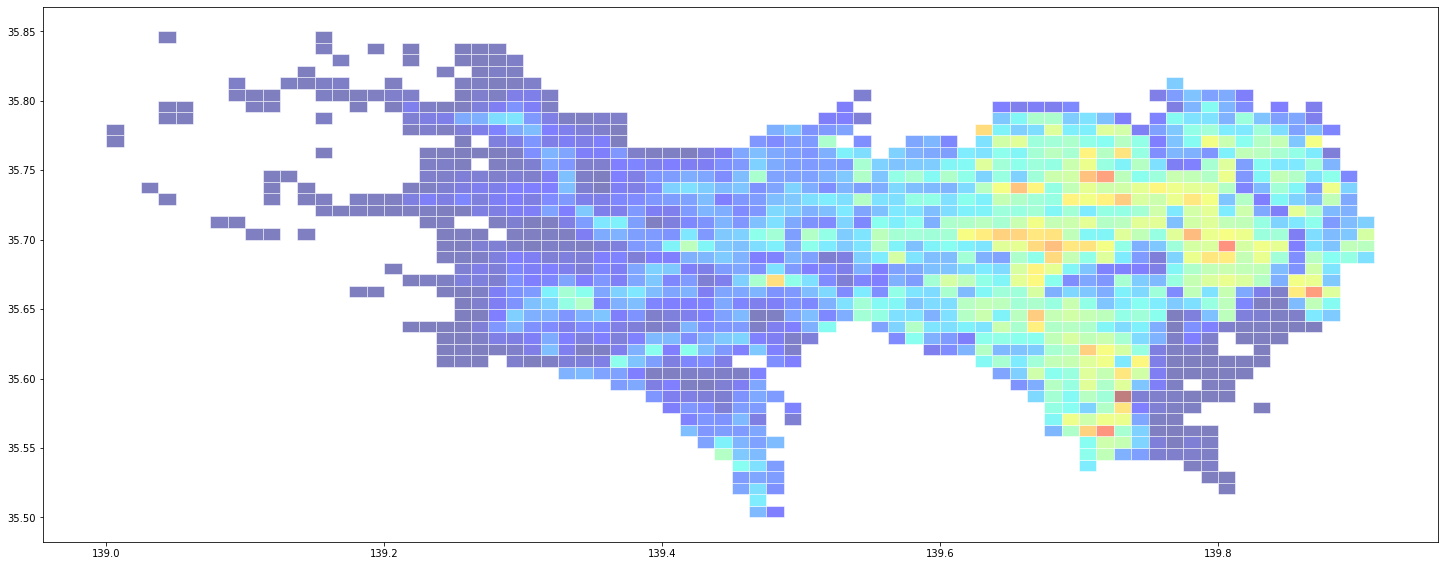

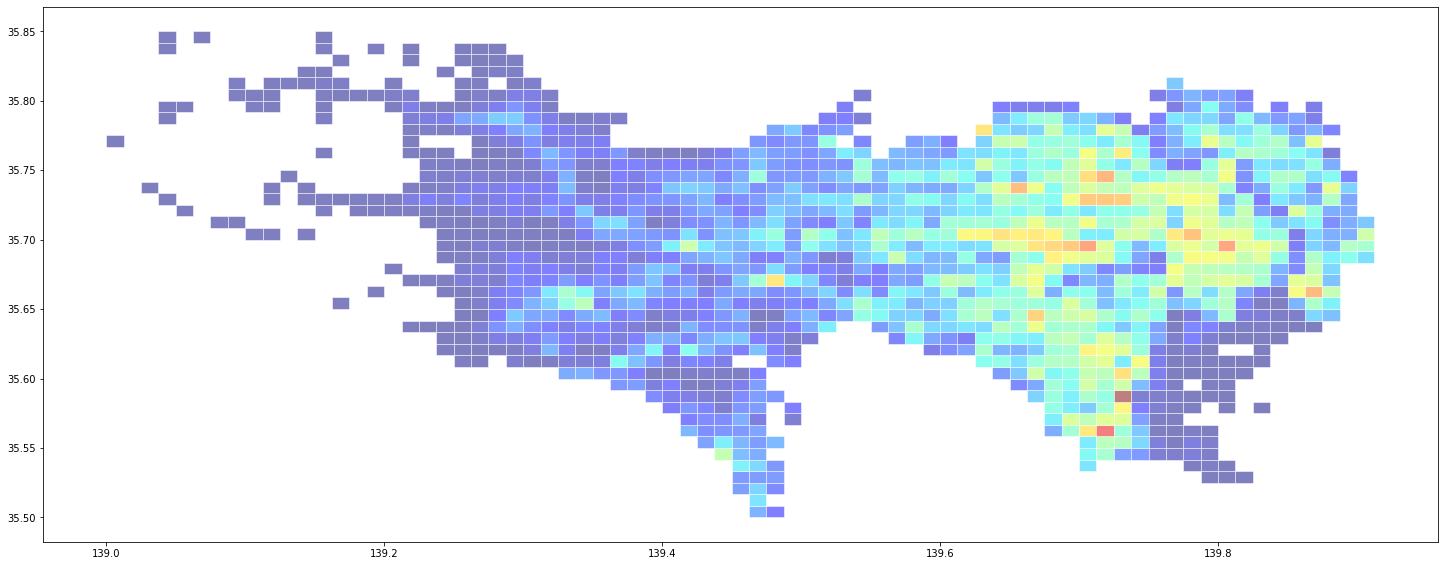

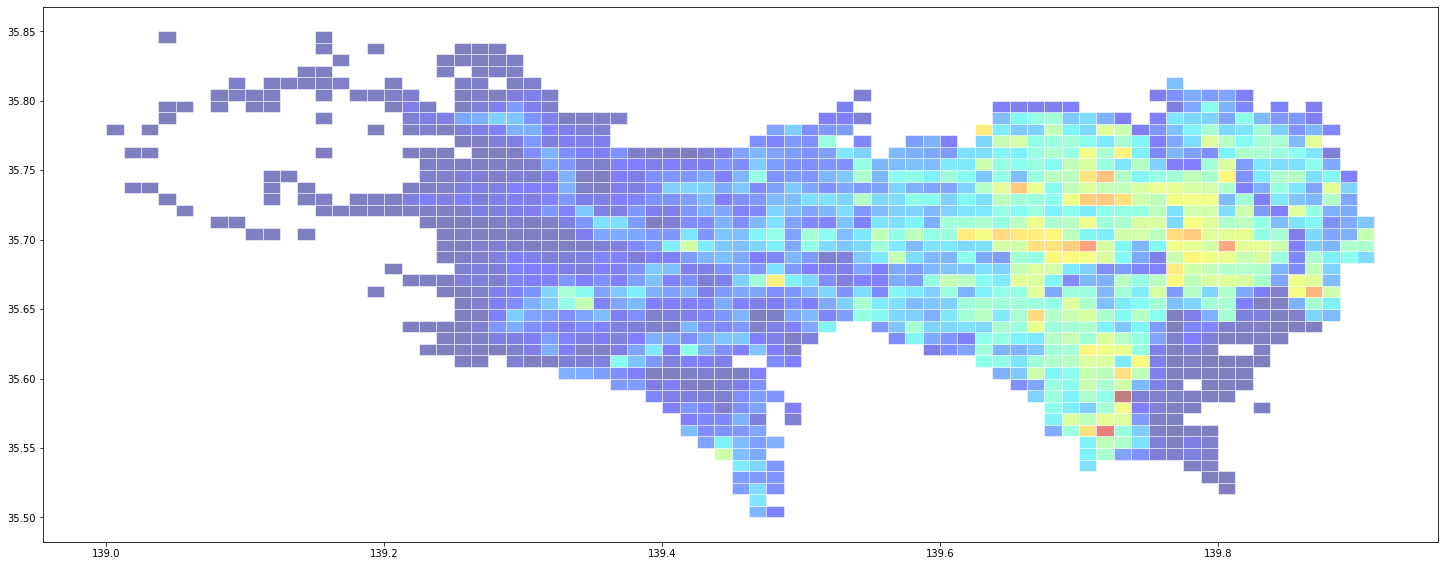

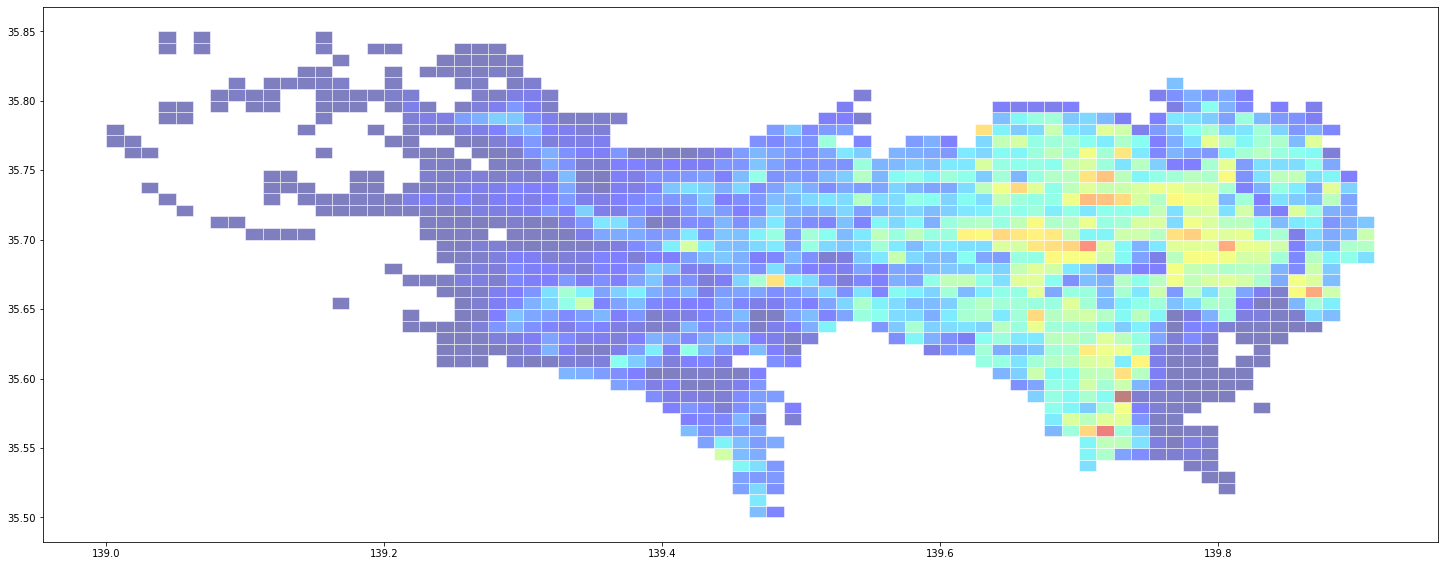

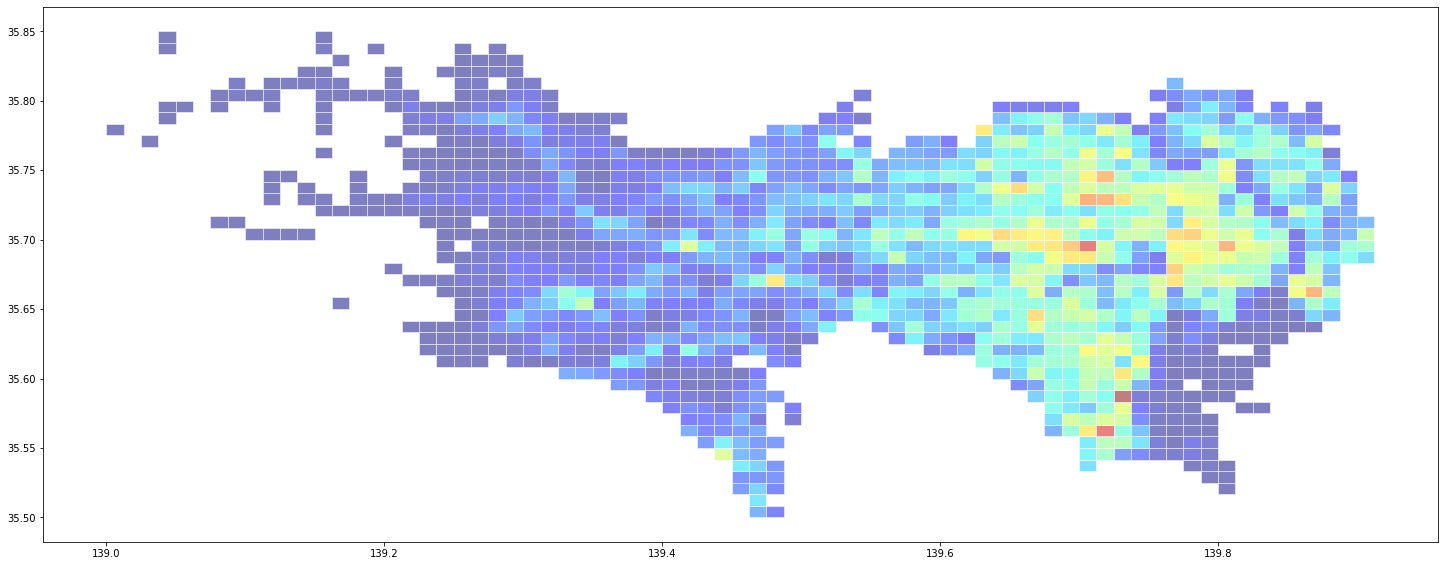

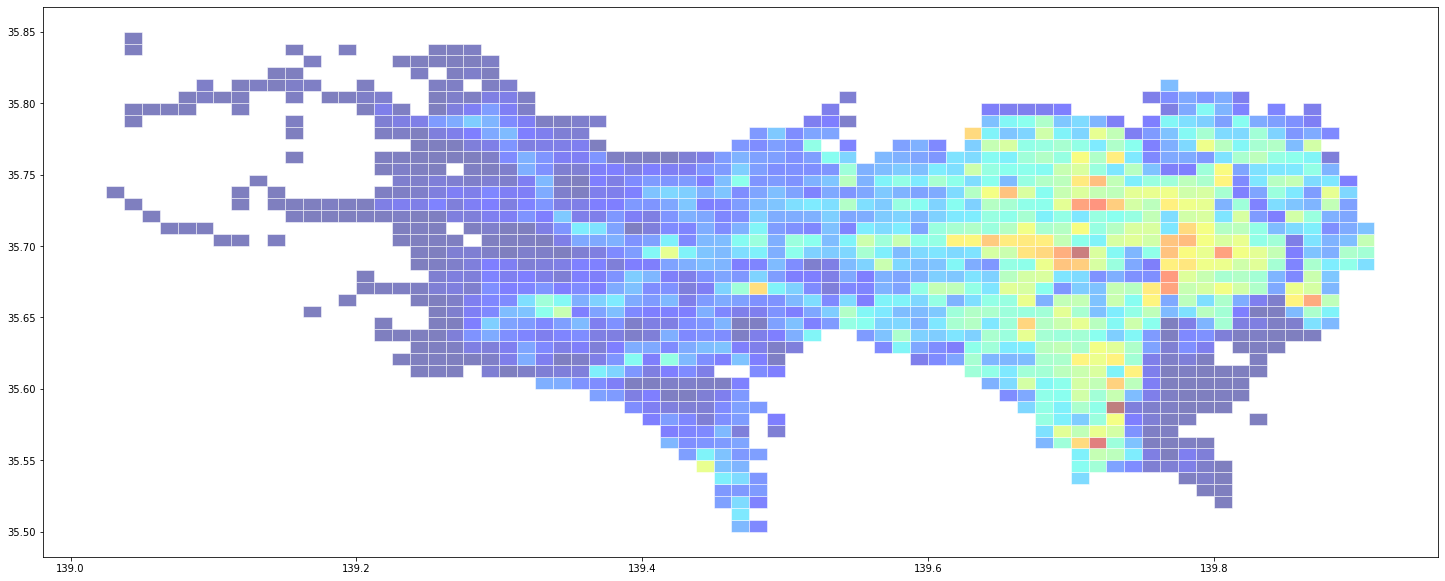

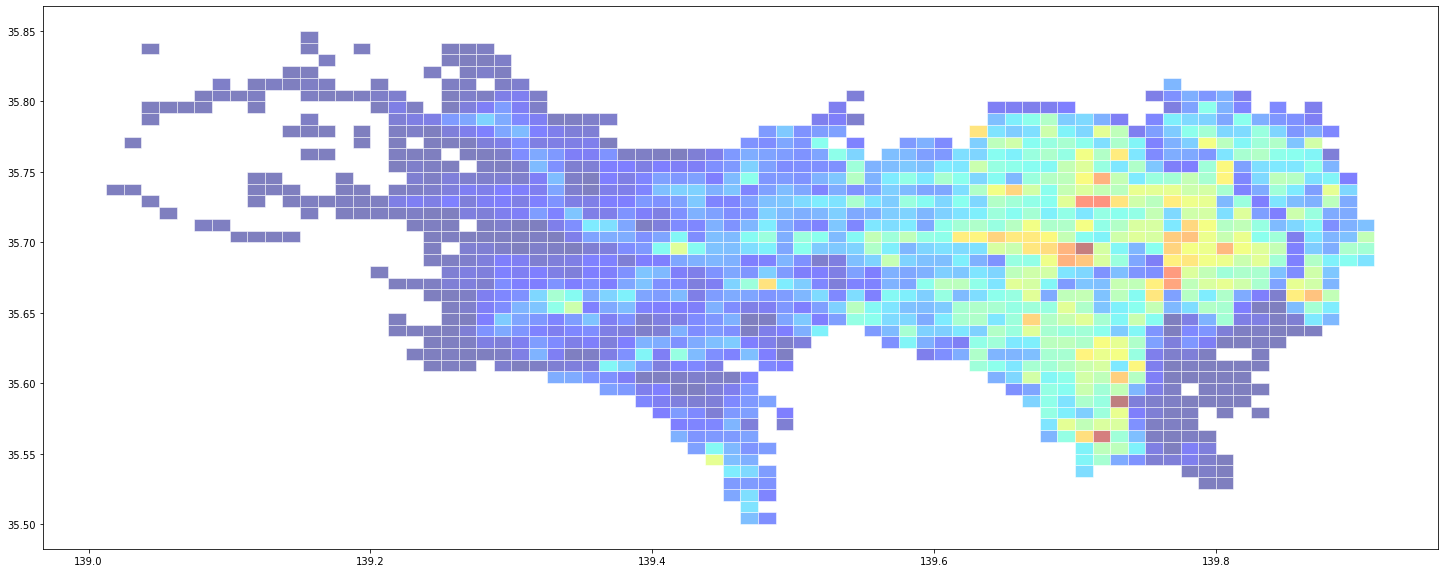

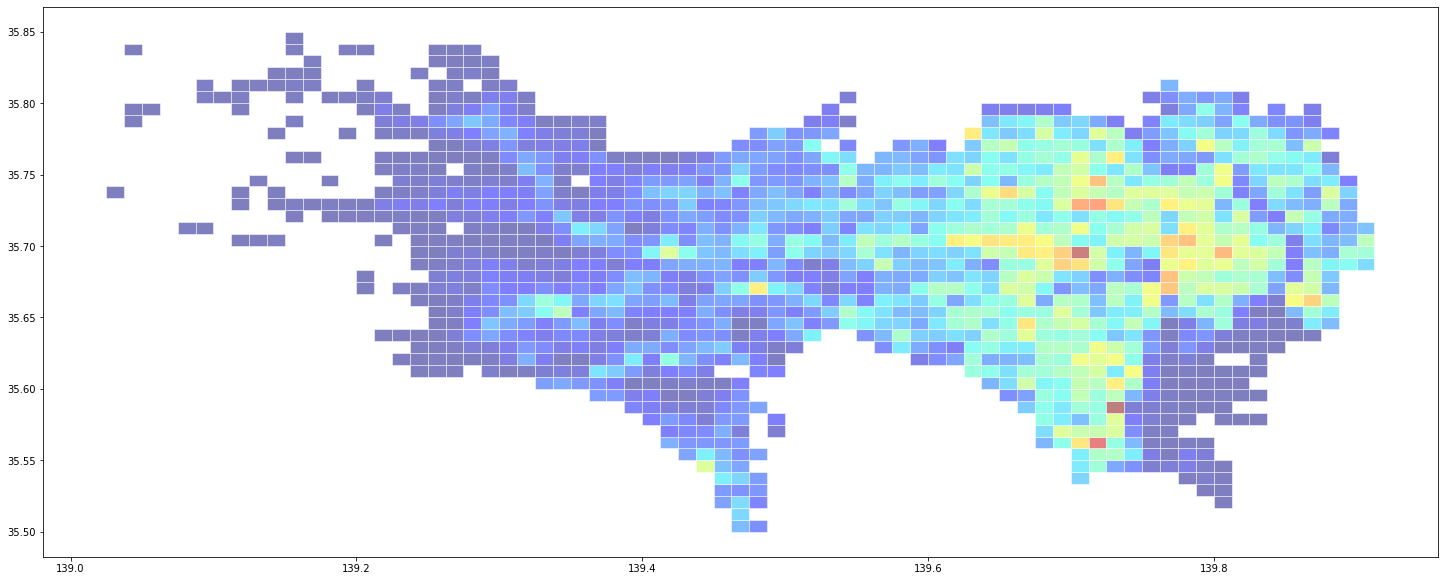

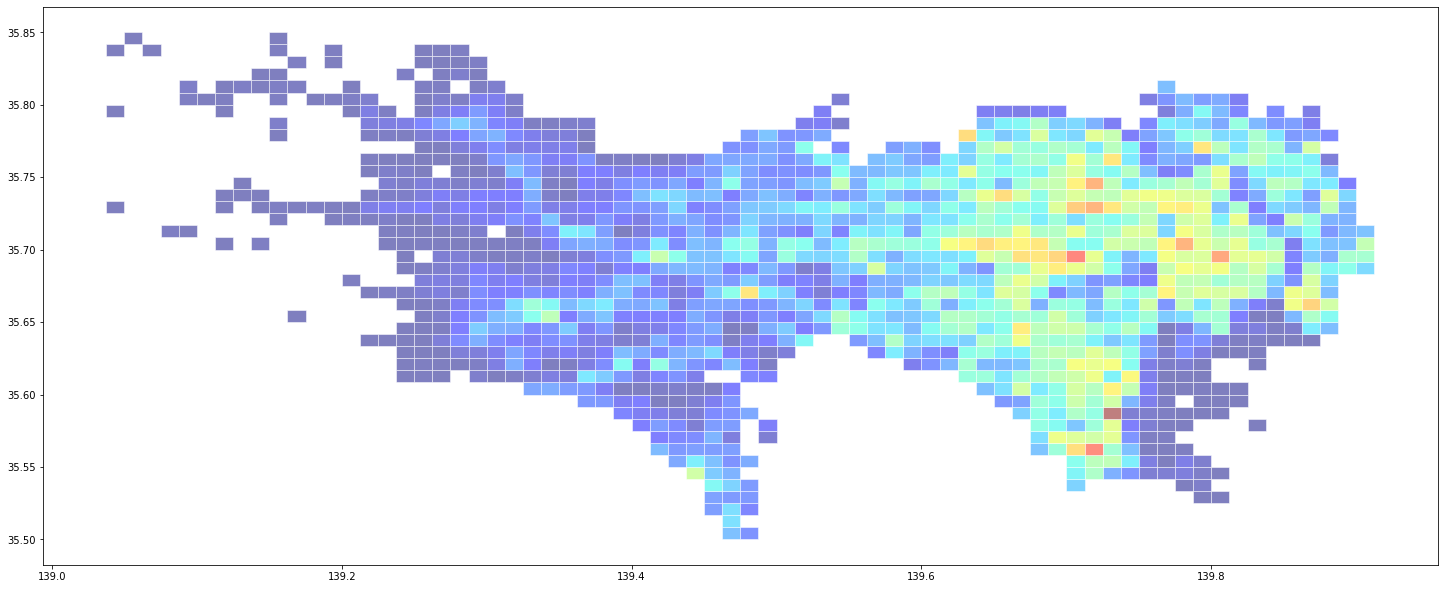

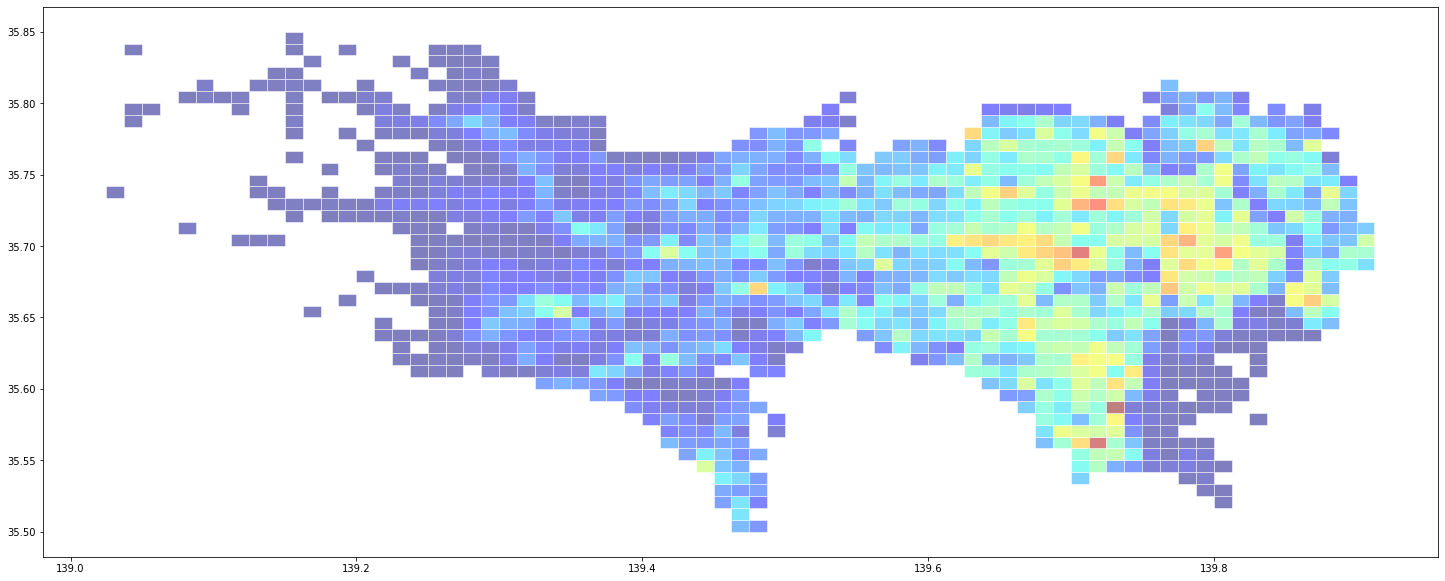

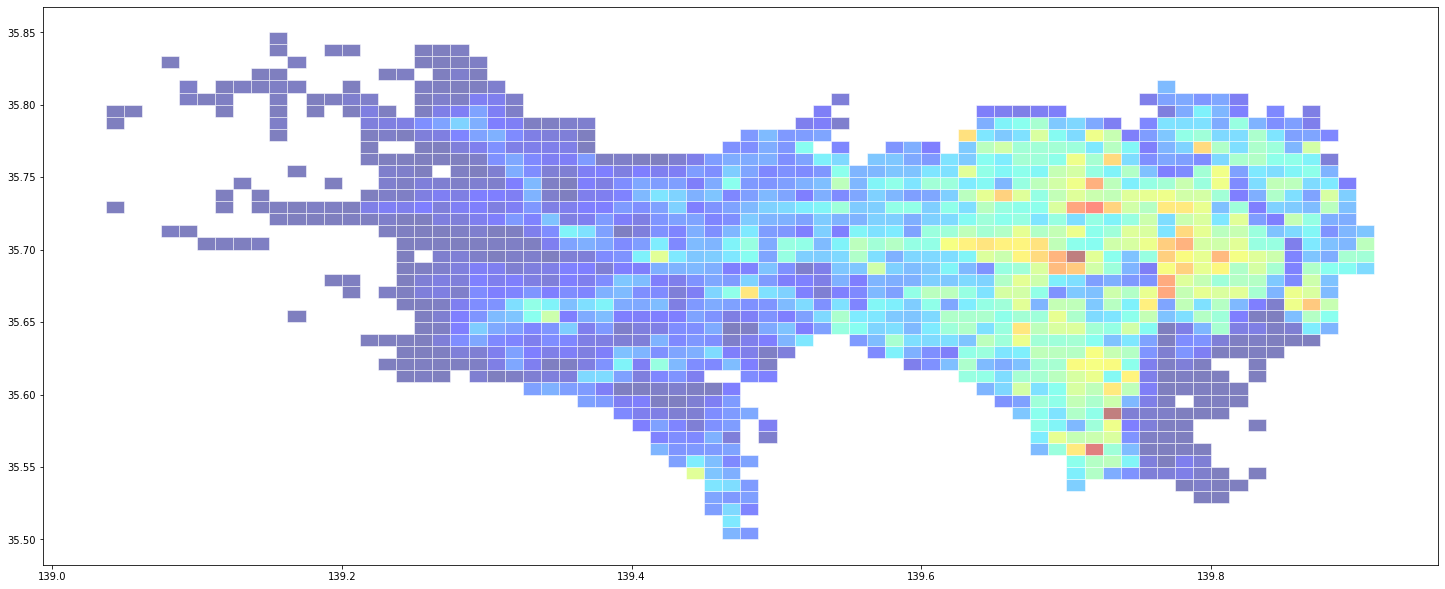

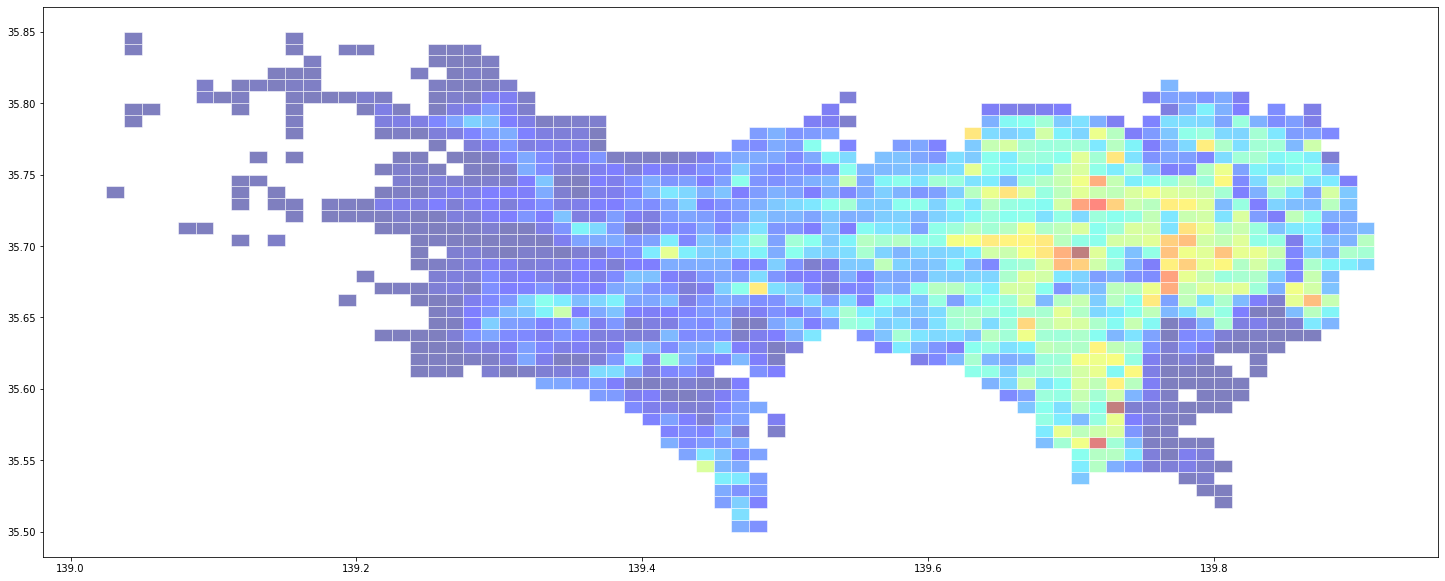

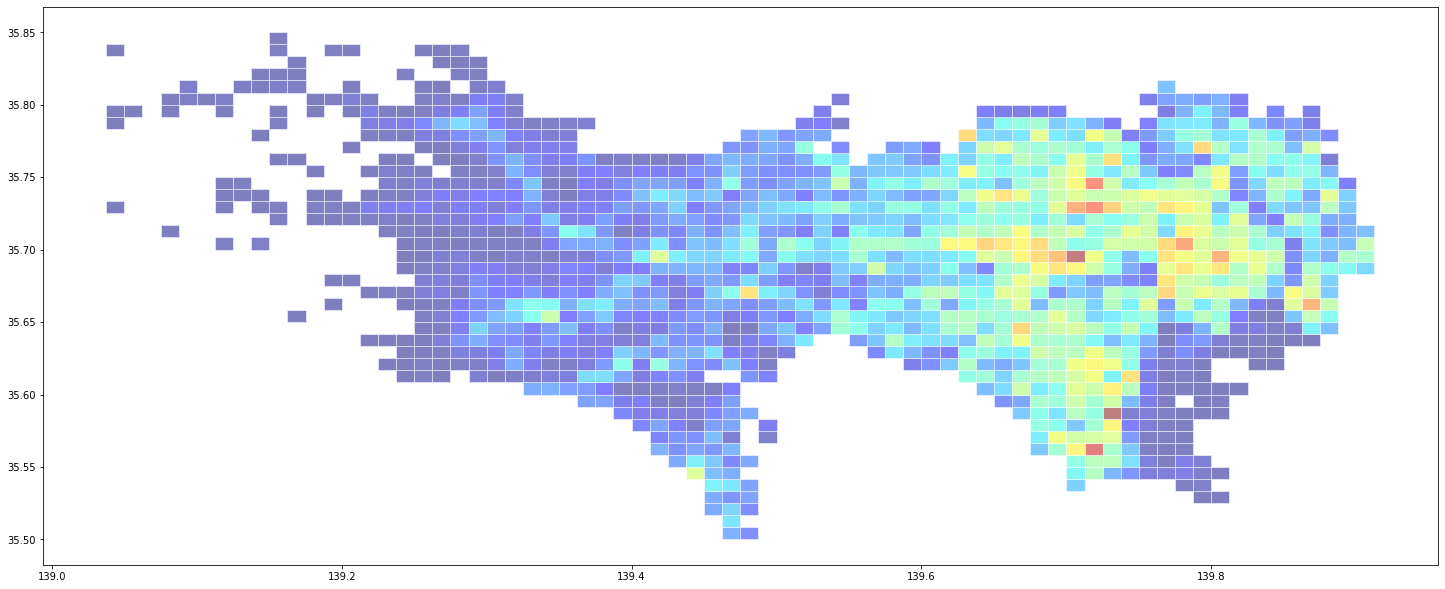

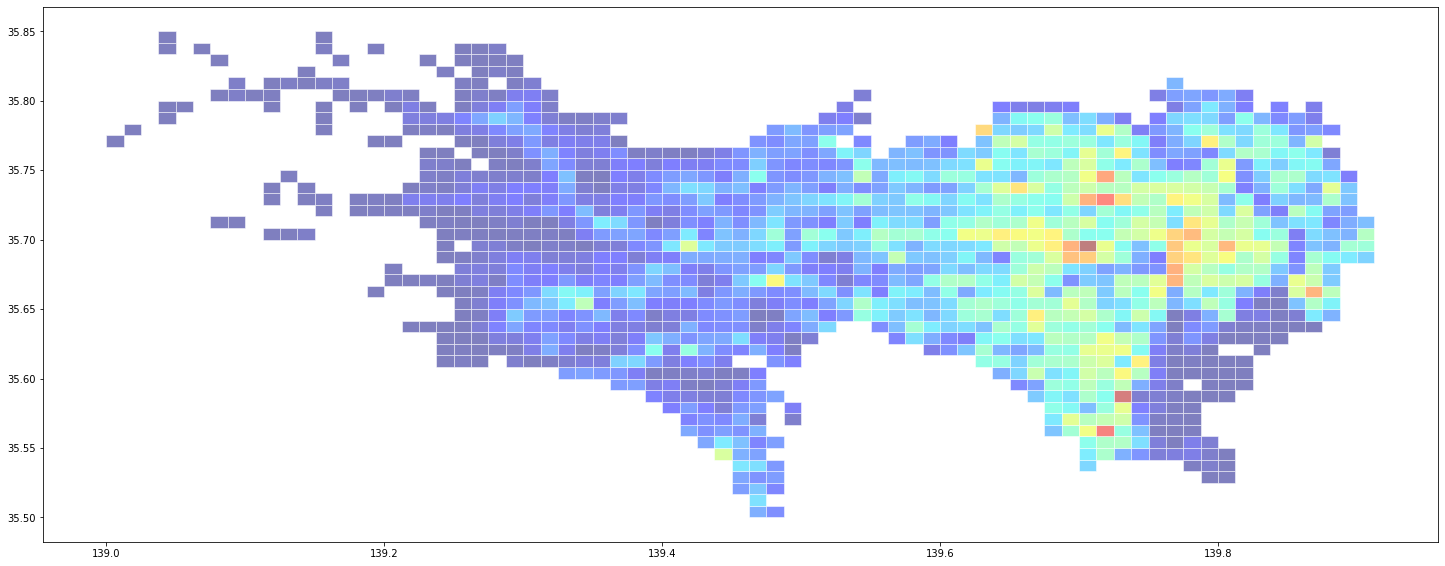

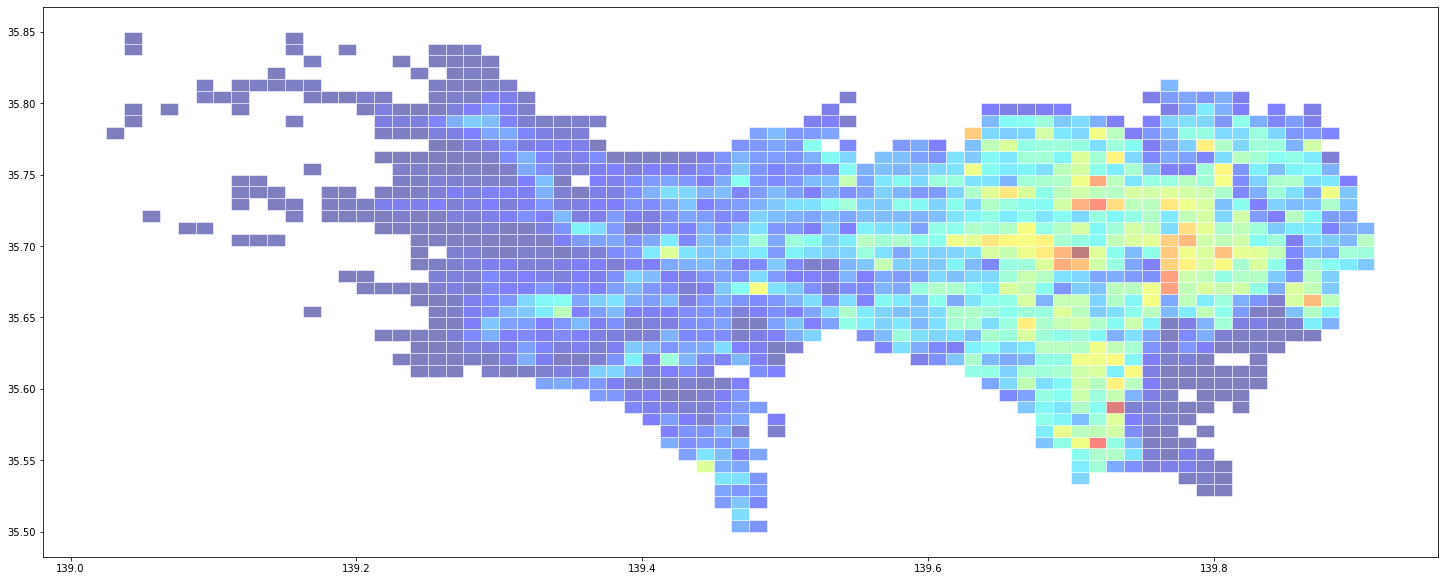

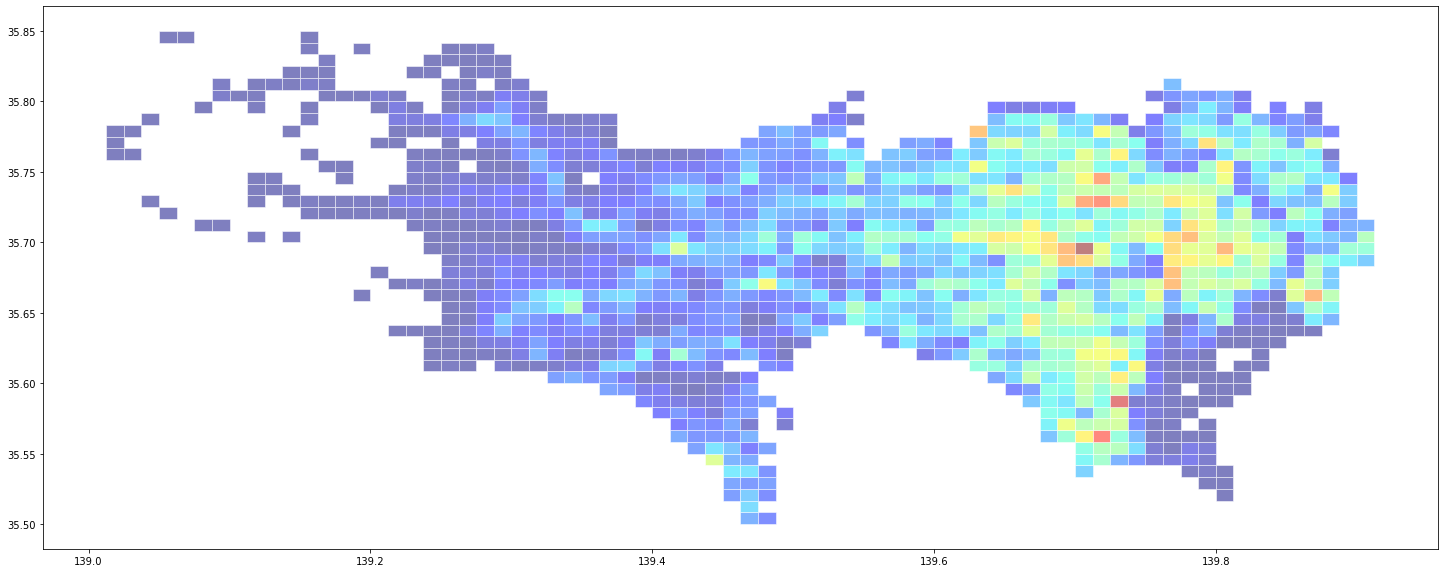

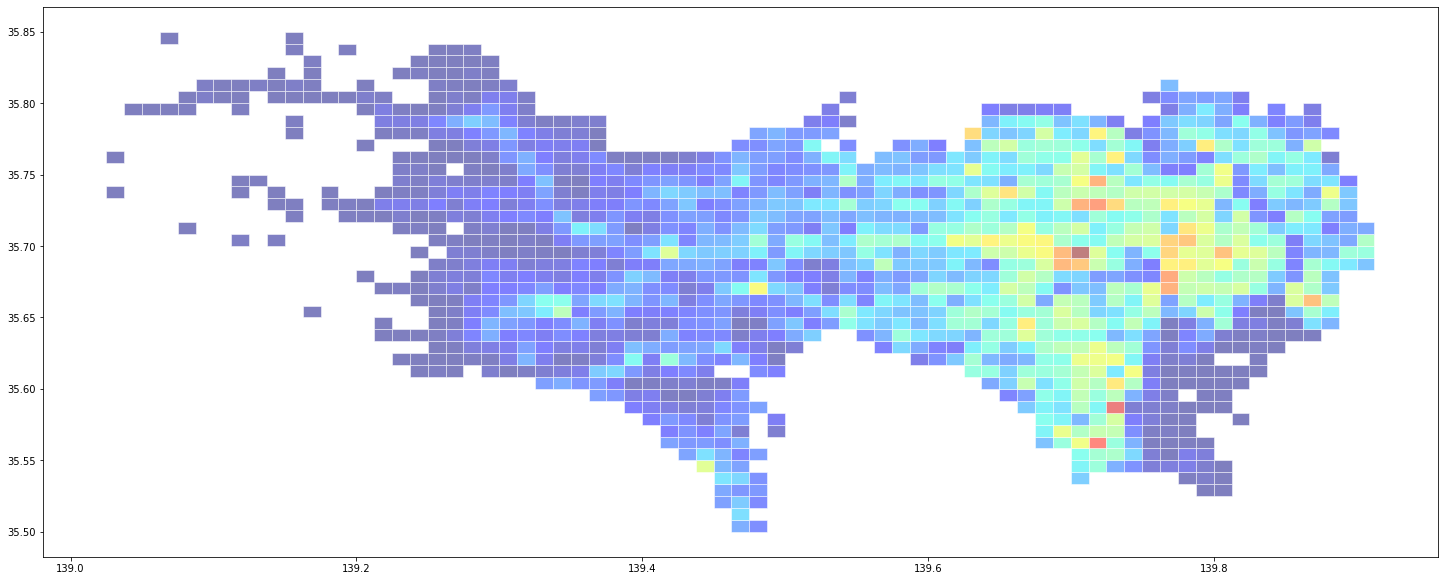

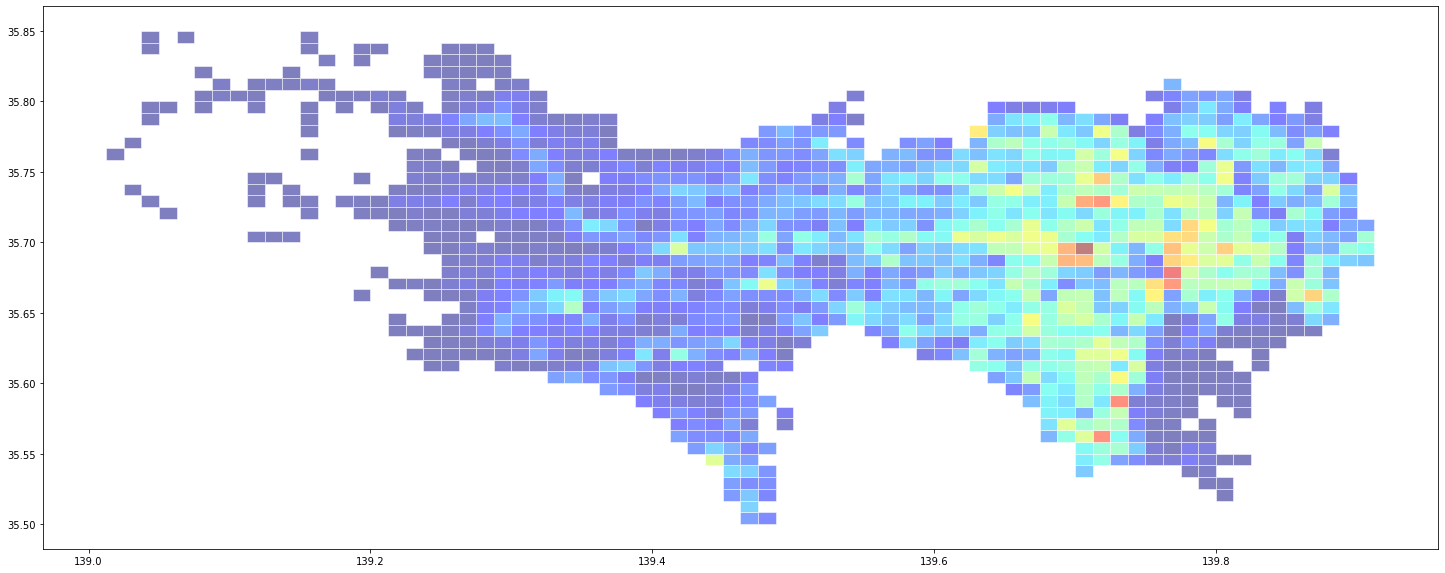

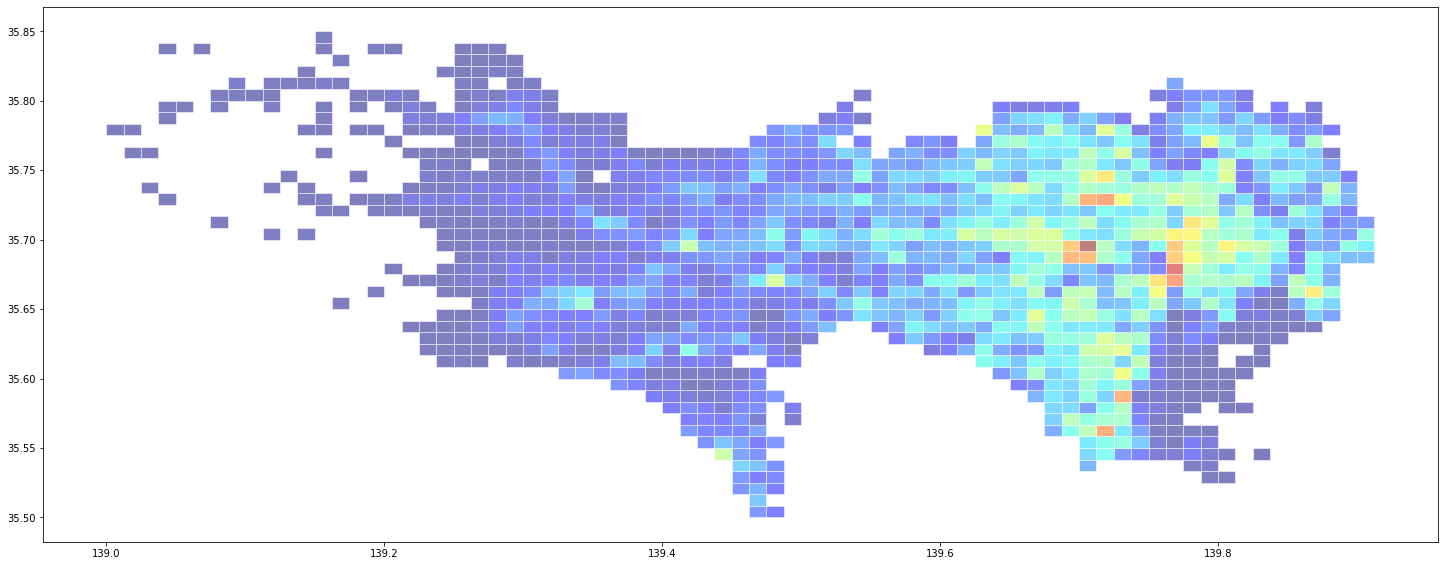

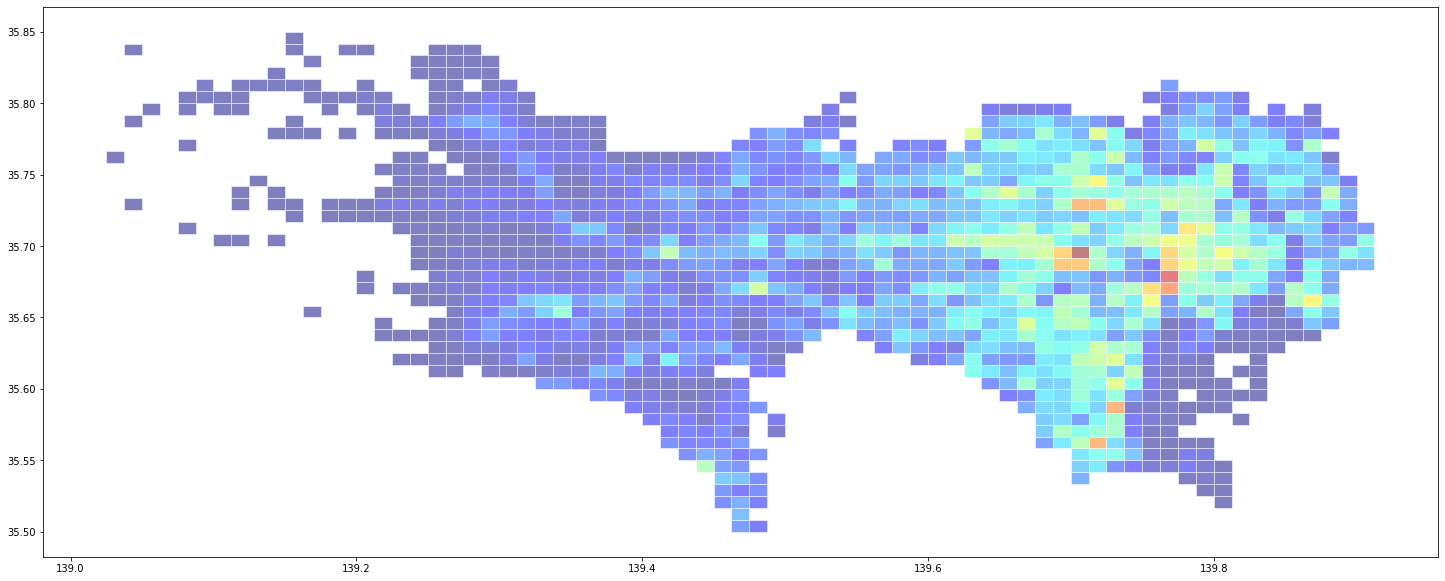

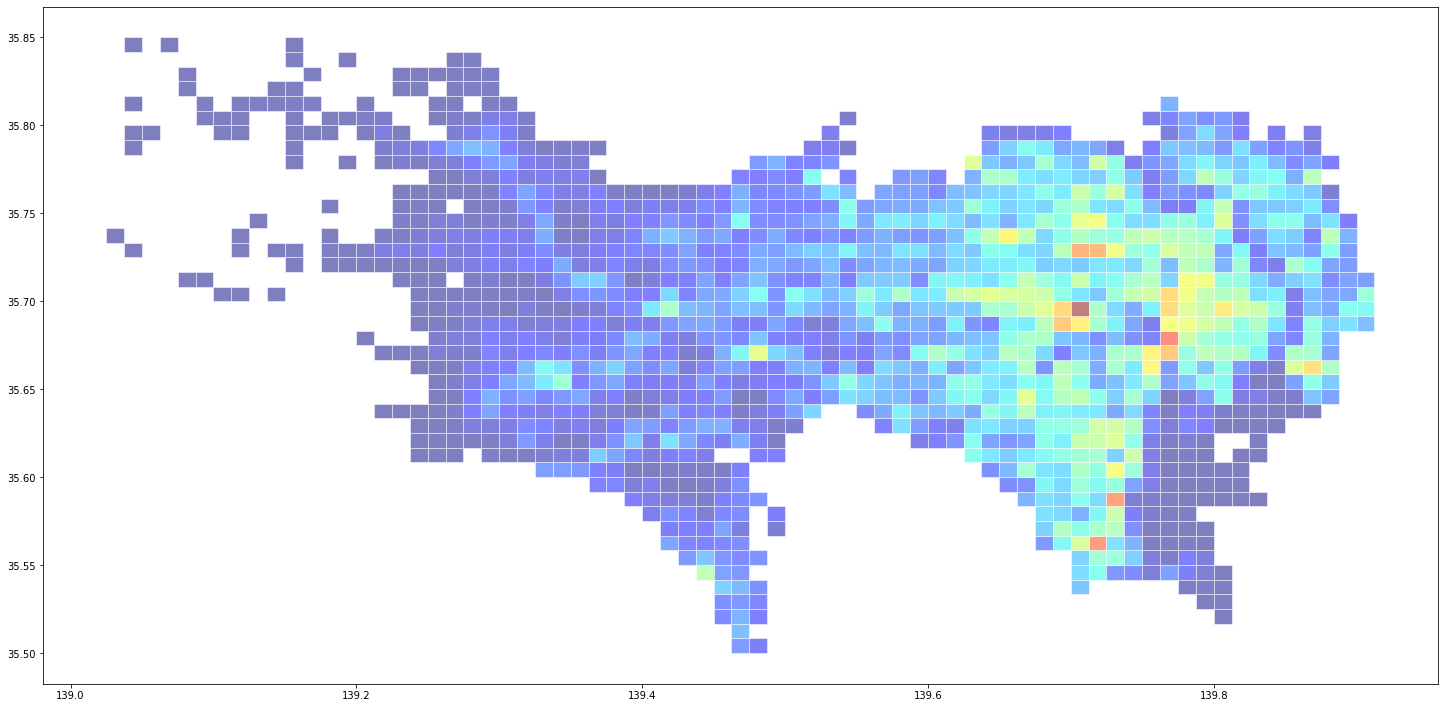

In [55]:
data_dir = '/home/yamanishi/project/trip_recommend/data/flow/mesh'
img_dir = '/home/yamanishi/project/trip_recommend/TS/image/year_month'
for year in [2019, 2020, 2021]:
    for month in range(1, 13):
        print(year, month)
        month = str(month).rjust(2, '0')
        mesh_df = pd.read_csv(os.path.join(data_dir, f'{year}_{month}_mesh.csv'))
        tokyo_mesh_df = mesh_df[mesh_df['mesh1kmid'].isin(tokyo_meshid)]
        tokyo_mesh_df = gpd.GeoDataFrame(tokyo_mesh_df)
        tokyo_mesh_df['geometry'] = tokyo_mesh_df.apply(get_mesh_point, axis=1)
        tokyo_mesh_df.plot(column='2_1', cmap='jet', edgecolor='w', alpha=0.5, figsize=(25, 15))
        filepath = os.path.join(img_dir, f'{year}_{month}.png')
        plt.savefig(filepath)

tokyo_2020_01_gdf.plot(column='2_1', cmap='jet',edgecolor='w', alpha=0.5,figsize=(25, 15))

In [27]:
df = pd.read_csv('/home/yamanishi/project/trip_recommend/data/flow/mesh/2020_01_mesh.csv')
df_tokyo = df[df['mesh1kmid'].isin(tokyo_meshid)]
print(df_tokyo.columns)

Index(['Unnamed: 0', 'mesh1kmid', 'year', 'month', '0_0', '0_1', '0_2', '1_0',
       '1_1', '1_2', '2_0', '2_1', '2_2', 'prefname', 'cityname', 'address',
       'lon_center', 'lat_center', 'lon_max', 'lat_max', 'lon_min', 'lat_min',
       'prefcode'],
      dtype='object')


In [28]:
mesh_tokyo = df_tokyo[['mesh1kmid', 'lon_center', 'lat_center', 'lon_max', 'lat_max', 'lon_min', 'lat_min', 'cityname']]
mesh_tokyo.to_csv('data/tokyo_mesh.csv')

# 2. pyrosmによる可視化とpoiの分割

In [3]:
import pyrosm

/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/study_group/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
from pyrosm import get_data
fp=get_data('kanto')

Downloaded Protobuf data 'kanto-latest.osm.pbf' (336.26 MB) to:
'/tmp/pyrosm/kanto-latest.osm.pbf'


In [5]:
#メッシュの分割と可視化
from pathlib import Path
import pandas as pd

mesh_2020_01_all_df = pd.read_csv('/home/yamanishi/project/trip_recommend/data/flow/mesh/2020_01_mesh.csv')
mesh1km_tokyo_2020_01_dir = Path('/home/yamanishi/project/trip_recommend/data/flow/13/2020/01')
attribute_dir = Path('/home/yamanishi/project/trip_recommend/data/flow/attribute')
attr_2020_df = pd.read_csv(attribute_dir/'attribute_mesh1km_2020.csv')
mesh_2020_01_tokyo_df = pd.read_csv(mesh1km_tokyo_2020_01_dir/'monthly_mdp_mesh1km.csv')

In [10]:
tokyo_meshid = mesh_2020_01_tokyo_df['mesh1kmid'].unique()

In [14]:
tokyo_2020_01 = mesh_2020_01_all_df[mesh_2020_01_all_df['mesh1kmid'].isin(tokyo_meshid)].reset_index()

In [17]:
tokyo_2020_01.loc[500,:]

index              52529
Unnamed: 0           500
mesh1kmid       53393267
year                2020
month                  1
0_0               4957.0
0_1               5899.0
0_2               5446.0
1_0               2596.0
1_1               5961.0
1_2               4299.0
2_0               3358.0
2_1               5941.0
2_2               4669.0
prefname             東京都
cityname            八王子市
address          東京都八王子市
lon_center     139.34375
lat_center     35.637501
lon_max       139.350006
lat_max        35.641666
lon_min       139.337494
lat_min        35.633335
prefcode              13
Name: 500, dtype: object

In [18]:
import pyrosm
index = 500
osm = pyrosm.OSM(fp, bounding_box=[tokyo_2020_01.loc[index, 'lon_min'], tokyo_2020_01.loc[index, 'lat_min'], tokyo_2020_01.loc[index, 'lon_max'], tokyo_2020_01.loc[index, 'lat_max']])

In [20]:
pois = osm.get_pois()

/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/study_group/lib/python3.7/site-packages/pyrosm/pyrosm.py:583: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.bounding_box,


In [30]:
pois.to_csv('a.csv')

# 3. geotag付きtweetの取得と分割

In [113]:
import tweepy
from datetime import datetime, timezone
consumer_key = 'l8V5FA48CTUmU2zGXJjU548BU'
consumer_secret = 'royCed2iqk5yS0pvukBoCBdAYkOBDvo8U6LuFt4yrqTWeqVlfL'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAIUwiQEAAAAAlMyR6aYvSVOGTkS%2BeL%2FKcqBjz28%3DGbYSx4Bd7EC1xIsKdPoLzVamILxQ1fVb16Ht7CzGE1dlMa2RPl'
access_token = '1577902360009277441-SI6jU7MCHq1Ho4XbmocJlMRbbtvDo3'
access_token_secret = 'hojQOMb2UowPidCKByIpDT6RPAncritKmYfDE8q8wmXyR'
df = pd.read_csv('./data/tokyo_mesh.csv')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def search_tweet_by_day(month, day, lat_center, lon_center, lat_min, lat_max, lon_min, lon_max, cityname, meshid):
    q='(あ OR い OR う OR え OR お OR か OR き OR く OR け OR こ OR さ OR し OR す OR せ OR そ OR た OR ち OR つ OR て OR と OR な OR に OR ぬ OR ね OR の OR は OR ひ OR ふ OR へ OR ほ OR ま OR み OR む OR め OR も OR や OR ゆ OR よ OR わ OR を OR ん OR , OR 。)'
    until = f'2022-{month}-{day}_00:00:00_JST'
    #until = datetime(2022, 11,28,15,0,0,0,timezone.utc)
    limit = datetime(2022, month,day-2,15,0,0,0,timezone.utc)
    meshids, ids, texts, lat_centers, lon_centers, created_ats, citynames = [],[],[],[],[],[],[]
    for i,tweet in enumerate(tweepy.Cursor(api.search_tweets, count=100, q=q, geocode=f"{lat_center},{lon_center},0.8km", until=until).items(2000)):
        #tweets=api.search_tweets(count=100, q=q, geocode="35.736054,139.7122,1km", until=until)
        #print(f'No {i}')
        #print(tweet.text)
        #print(tweet.created_at)
        if tweet.place is not None:
            bounding_box = tweet.place.bounding_box.coordinates
            #print(bounding_box)
            lon_min_tmp = bounding_box[0][0][0]
            lon_max_tmp = bounding_box[0][1][0]
            lat_min_tmp = bounding_box[0][0][1]
            lat_max_tmp = bounding_box[0][2][1]
            lon_center_tmp = (lon_max_tmp+lon_min_tmp)/2
            lat_center_tmp = (lat_max_tmp+lat_min_tmp)/2
            print(lon_min_tmp, lon_max_tmp, lat_min_tmp, lat_max_tmp)
            print(lat_min, lat_center_tmp, lat_max, lon_min, lon_center_tmp, lon_max)
            if (lat_min < lat_center_tmp < lat_max) and (lon_min < lon_center_tmp < lon_max):
                ids.append(tweet.id)
                texts.append(tweet.text)
                lat_centers.append(lat_center_tmp)
                lon_centers.append(lon_center_tmp)
                created_ats.append(tweet.created_at.strftime('%Y-%m-%d_%H:%M:%S'))
                citynames.append(cityname)
                meshids.append(meshid)
        if tweet.created_at < limit:
            break
    df = pd.DataFrame({'meshid': meshids,'id':ids, 'text':texts, 'latitude':lat_centers, 'longitude':lon_centers, 'created_at':created_ats, 'cityname':citynames})
    df.to_csv('data/tweet/geotweet.csv', mode='a', header=False)
        #print(lon_center, lat_center)
        #print(tweet.id)
        #until = tweet.created_at.strftime('%Y-%m-%d_%H:%M:%S')
        #print(until)
        #print('-'*100)


In [86]:
df_mesh = pd.read_csv('./data/tokyo_mesh.csv')

In [115]:
for index in range(300,311):
    search_tweet_by_day(11,29, df_mesh.loc[index, 'lat_center'], df_mesh.loc[index, 'lon_center'], df_mesh.loc[index, 'lat_min'], df_mesh.loc[index, 'lat_max'], df_mesh.loc[index, 'lon_min'], df_mesh.loc[index, 'lon_max'], df_mesh.loc[index, 'cityname'], df_mesh.loc[index, 'mesh1kmid'])

139.161531 139.43004 35.597798 35.718529
35.625 35.6581635 35.6333351 139.287506 139.2957855 139.300003
139.33104367558497 139.33104367558497 35.631220779039005 35.631220779039005
35.625 35.631220779039005 35.6333351 139.324997 139.33104367558497 139.337494
139.3396812197156 139.3396812197156 35.62523511265502 35.62523511265502
35.625 35.62523511265502 35.6333351 139.337494 139.3396812197156 139.350006
139.35840161369163 139.35840161369163 35.63093428490125 35.63093428490125
35.625 35.63093428490125 35.6333351 139.350006 139.35840161369163 139.362503
139.35840161369163 139.35840161369163 35.63093428490125 35.63093428490125
35.625 35.63093428490125 35.6333351 139.362503 139.35840161369163 139.375
139.161531 139.43004 35.597798 35.718529
35.6333351 35.6581635 35.6416664 139.25 139.2957855 139.262497
139.2699219 139.2699219 35.6323912 35.6323912
35.6333351 35.6323912 35.6416664 139.262497 139.2699219 139.274994
139.26697075366974 139.26697075366974 35.6311810245947 35.6311810245947
35.633

In [92]:
df_mesh['cityname']

0       西多摩郡奥多摩町
1       西多摩郡奥多摩町
2       西多摩郡奥多摩町
3       西多摩郡奥多摩町
4       西多摩郡奥多摩町
          ...   
1447         清瀬市
1448         清瀬市
1449         清瀬市
1450         清瀬市
1451         清瀬市
Name: cityname, Length: 1452, dtype: object

In [1]:
np.random.uniform(0.3, 0.7)

0.5493678454847366

In [7]:
a = torch.rand(2,3)
b=a/a.norm(dim=1).unsqueeze(1)
print(a)
print(b)

tensor([[0.0641, 0.8027, 0.2528],
        [0.4569, 0.2178, 0.5372]])
tensor([[0.0759, 0.9511, 0.2995],
        [0.6190, 0.2951, 0.7278]])


In [8]:
(b**2).sum(dim=1)

tensor([1.0000, 1.0000])

In [3]:
a = torch.rand(5)
mask = torch.tensor([2,3])
a[~mask]=0
a

tensor([0.3881, 0.0000, 0.0000, 0.2561, 0.2842])

In [6]:
a = torch.rand([500])
b = torch.tensor(498).unsqueeze(0)
torch.nn.functional.cross_entropy(a,b)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)